# Dynamic Load-Aware Multi-District Express Delivery Route Optimization with Genetic Algorithm and Simulated Annealing: Coordinated Control of Fuel Efficiency and Carbon Emissions #

###  **BIUH-DT2**  
### **ID:2023020204**  
### **Name: Hongye XU**  
### **Date:21.4.2025** 


## Abstract  
With annual carbon emissions in the express delivery industry growing at 15% (China Logistics Society 2023), this study proposes a dynamic load-aware multi-algorithm framework to optimize distribution strategies. By integrating real-time payload fluctuations, hybrid fleet scheduling, and comparative analysis of metaheuristic approaches, we develop a multi-objective optimization system combining simulated annealing (SA) and genetic algorithms (GA). Key contributions include:  

1. A linear load-energy coupling model validated through urban logistics case studies, incorporating time window constraints.  
2. A mixed fleet strategy balancing diesel and electric vehicles with capacity-aware scheduling for economic-ecological trade-offs.  
3. An adaptive simulated annealing algorithm with dynamic neighborhood operators and temperature decay (α=0.95).  
4. A novel genetic algorithm featuring tournament selection, path-based crossover, and load-sensitive mutation operators.  
5. Comparative analysis demonstrating SA's superior local search capability versus GA's population-based global exploration.  

**Keywords**: Dynamic Load Awareness; Hybrid Metaheuristics; Genetic Algorithm; Carbon Emission Reduction; Vehicle Routing Problem

## Table of Contents  
1. [Introduction](#introduction)  
   - 1.1 [Background](#background)  
   - 1.2 [Problem description](#problem-description)  
      - 1.2.1 [Problem Context and Parameters](#problem-context-and-parameters)  
      - 1.2.2 [Key Limitations and Challenges](#key-limitations-and-challenges)  
      - 1.2.3 [Formal Problem Statement](#formal-problem-statement)  
2. [Theoretical Background](#theoretical-background)  
   - 2.1 [Multi-Objective Optimization in Logistics](#multi-objective-optimization-in-logistics)  
   - 2.2 [Normalized](#normalized)  
   - 2.3 [Problem Formulation](#problem-formulation)  
3. [Methodology](#methodology)  
   - 3.1 [Simulated Annealing Algorithm Design](#simulated-annealing-algorithm-design)  
   - 3.2 [Genetic Algorithm Design](#genetic-algorithm-design)  
4. [Results and Discussion](#results-and-discussion)  
   - 4.1 [Data Sources and Experimental Setup](#data-sources-and-experimental-setup)  
      - 4.1.1 [Dataset](#dataset)  
      - 4.1.2 [Vehicle Parameters](#vehicle-parameters)  
   - 4.2 [Algorithm Performance Analysis](#algorithm-performance-analysis)  
      - 4.2.1 [Results for Weight Combination (0.8, 0.2)](#results-for-weight-combination-08-02)  
      - 4.2.2 [Results for Weight Combination (0.6, 0.4)](#results-for-weight-combination-06-04)  
      - 4.2.3 [Route Optimization Visualization](#route-optimization-visualization)  
      - 4.2.4 [Algorithm Comparison](#algorithm-comparison)  
5. [Conclusion and Future Work](#conclusion-and-future-work)  
   - 5.1 [Key Findings](#key-findings)  
   - 5.2 [Practical Implications](#practical-implications)  
   - 5.3 [Limitations and Future Directions](#limitations-and-future-directions)  
6. [References](#references) 

## 1 Introduction   

### 1.1 Background   
With the continuous improvement of living standards and the growing prevalence of online shopping, the logistics industry faces escalating operational pressures. Survey data indicates that inter-city logistics transportation primarily relies on freight trucks, leading to a rapid annual increase in carbon emissions from express delivery services. There is an urgent need to develop efficient transportation solutions to effectively reduce carbon emissions in real-world delivery systems. My research initiative, titled "CVPR: Emission Reduction via Fuel-Efficient Delivery Routing", bridges theoretical frameworks with practical applications. The finalized paper, "Dynamic Load-Aware Multi-District Express Delivery Route Optimization with Genetic Algorithm and Simulated Annealing: Coordinated Control of Fuel Efficiency and Carbon Emissions", proposes a methodology that strategically simplifies variables and operational complexities while maintaining academic rigor. This approach ensures a high-quality study aligned with my current expertise in optimization modeling.[1]  

### 1.2 Problem description  
The express delivery industry faces a critical challenge in reconciling operational efficiency with environmental sustainability. Traditional vehicle routing models predominantly optimize for single objectives, such as minimizing fuel costs or delivery time, while neglecting the dynamic interplay between real-time payload variations and heterogeneous vehicle fleets. This oversight leads to suboptimal routing decisions that fail to adapt to fluctuating load conditions, resulting in excessive fuel consumption and carbon emissions.  

#### 1.2.1 Problem Context and Parameters   
This study addresses a practical logistics scenario involving:  
- 20 customer nodes distributed across an urban area, each with specific spatial coordinates, demand quantities (ranging from 200 kg to 450 kg), and time windows for service (e.g., 8:00–12:00 for Customer 1, 9:00–15:00 for Customer 2).  
- A central depot located at coordinates (0, 0) with a 24-hour operating window.  
- A mixed fleet of four vehicles with heterogeneous capabilities:  
  - 2 Light Trucks: Maximum load capacity of 1,100 kg, fuel consumption rate of 0.25 L/km, and CO₂ emission rate of 2.68 kg/L.  
  - 1 Medium Truck: Maximum load capacity of 2,500 kg, fuel consumption rate of 0.35 L/km, and CO₂ emission rate of 2.71 kg/L.  
  - 1 Hybrid Vehicle: Maximum load capacity of 3,000 kg, fuel consumption rate of 0.18 L/km, and CO₂ emission rate of 1.02 kg/L.  

#### 1.2.2 Key Limitations and Challenges   
Existing approaches struggle with the following aspects of this problem:  
1. **Dynamic Load Variability**: Customer demands vary significantly (e.g., 200 kg at C3 vs. 450 kg at C2), requiring real-time adjustments to vehicle payloads. Fuel consumption increases nonlinearly with load (5% penalty per 10% load increase), demanding precise load-energy coupling.  
2. **Fleet Heterogeneity**: Balancing the use of fuel-intensive diesel trucks (higher CO₂ rates) and low-emission hybrid vehicles requires strategic task allocation to minimize total cost and emissions simultaneously.

#### 1.2.3 Formal Problem Statement  
The Multi-Objective Vehicle Routing Problem with Dynamic Load Constraints (MO-VRP-DLC) in this context requires:  
- Assigning 20 customer demands to four vehicles while respecting individual capacities (1,100–3,000 kg).  
- Designing routes that satisfy both spatial constraints (coordinates) and temporal constraints (time windows).  
- Optimizing a weighted objective function combining fuel costs (ω1) and CO₂ emissions (ω2), where fuel consumption for each arc (i, j) is calculated as: $$
F_{ij}^k = \text{fuel rate} \times \text{distance} \times \left(1 + 0.05 \cdot \frac{\text{load}}{\text{capacity}}\right)
$$

## 2 Theoretical Background  

### 2.1 Multi-Objective Optimization in Logistics 
Vehicle routing problems (VRP) inherently involve conflicting objectives such as minimizing operational costs (fuel consumption) and reducing environmental impacts (carbon emissions). Classical VRP formulations often simplify these complexities by adopting single-objective models, but real-world logistics demand trade-off analysis between economic and ecological goals. The Weighted Sum Method (Marler & Arora, 2004) provides a pragmatic framework to unify multi-objective optimization into a scalarized function:  
$$
\text{Total Cost} = W_1 \cdot F_{\text{fuel}} + W_2 \cdot F_{\text{emission}} \quad (W_1 + W_2 = 1)
$$
where $F_{\text{fuel}}$ and $F_{\text{emission}}$ represent fuel consumption and carbon emissions, respectively. Weight coefficients (W1 = 0.6, W2 = 0.4) are calibrated through sensitivity analysis or stakeholder preferences, enabling decision-makers to balance sustainability and profitability.[2]  

### 2.2 Normalized  
$$
\text{Normalized Cost} = \omega_1 \cdot \frac{F_{\text{total}}}{F_{\text{max}}} + \omega_2 \cdot \frac{E_{\text{total}}}{E_{\text{max}}}
$$

### 2.3 Problem Formulation   
The model addresses a Multi-Objective Vehicle Routing Problem (MO-VRP) with dynamic load constraints.  
1. **Decision Variables**:  
   - $X_{ijk}$: Binary variable indicating whether vehicle \(k\) travels from node \(i\) to \(j\).  
   - $W_k$: Real-time load of vehicle \(k\). 
2. **Objective Function**:  
   $$
   \text{Minimize} \ Z = \omega_1 \cdot \sum_{k=1}^{3} \sum_{(i,j)} F^k_{ij} + \omega_2 \cdot \sum_{k=1}^{3} \sum_{(i,j)} E^k_{ij}
   $$  
   - $F^k_{ij}$: Fuel consumption for vehicle \(k\) on arc \((i,j)\).  
   - $F^k_{ij} = \text{fuel rate} \times \text{distance} \times \left(1 + 0.05 \cdot \frac{\text{load}}{\text{capacity}}\right)$.  
   - $E^k_{ij}$: Carbon emissions derived from $F^k_{ij}$.  
   - $E^k_{ij} = F^k_{ij} \times \text{CO}_2 \text{ rate}$. 


 **Capacity**:  
$$
\sum_{i \in R_k} q_i \leq Q_k \quad \forall k \in K
$$
    

## 3 Methodology   

### 3.1 Simulated Annealing Algorithm Design  
1. **Solution Encoding**:  
   Each solution is represented as a permutation of customer nodes partitioned by vehicle routes, e.g., `[C1, C3 | Depot | C2, C4]` for three vehicles.  
2. **Neighborhood Operators**:  
   - **Swap**: Exchange two nodes in high-load routes.  
   - **Relocate**: Move a customer node from one route to another, dynamically balancing payloads across vehicles to avoid capacity violations.  
   - **Cross-Swap**: Swap customer nodes between two different routes to explore inter-route load distributions and reduce overall travel distance.  
3. **Cooling Schedule**:  
   - Adaptive temperature decay controlled by $T_{k+1} = \alpha \cdot T_k$, with α = 0.95 ensures slower cooling to enhance global exploration in large-scale problems.  
   - Set initial $T_0 = 10000$. During the high-temperature phase, the algorithm accepts inferior solutions with higher probability to avoid local optima.  
   - Max iteration: 10000.  
   - Adaptive acceptance rate for escaping local minima.

### 3.2 Genetic Algorithm Design   
1. **Solution Encoding**:  
   Each chromosome represents vehicle routes as depot-separated permutations, e.g., [[Depot, C1, C3, Depot], [Depot, C2, C5, Depot], ...]
2. **Population Initialization**:  
- Sort customers by descending demand and earliest time window.  
- Assign to vehicles while respecting capacity constraints, allowing partial invalid solutions (penalized in fitness).  
3. **Fitness Function**:  
$$
   \text{Fitness} = \frac{1}{Z + \epsilon} \quad (\epsilon = 10^{-6})
   $$
Invalid solutions receive zero fitness.  
4. **Evolutionary Operators**:  
- **Tournament Selection**: 3-candidate tournaments to preserve diversity.  
- **Path-Based Crossover**: Exchange sub-paths between parents, removing duplicates to ensure validity.  
- **Load-Sensitive Mutation**: Use SA's operators (swap, relocate, cross-swap) with capacity checks.  
5. **Adaptive Termination**:  
Early stopping when:  
$$
   \left| \frac{1}{10} \sum_{i=1}^{10} Z_{t-i} - Z_t \right| < 10^{-6}
   $$  
**Parameters**:  
- Population size: 30  
- Max generations: 100  
- Crossover rate: 0.8  
- Mutation rate: 0.1  

## 4 Results and Discussion   

### 4.1 Data Sources and Experimental Setup  
#### 4.1.1 Dataset  
Modified Solomon R101 instances with 20 customer nodes:  

| Point | X coordinate | Y coordinate | Demand (kg) | Time window (h) |  
|-------|--------------|--------------|-------------|-----------------|  
| Depot | 0            | 0            | 0           | 0-24            |  
| C1    | 2            | 5            | 300         | 8-12            |  
| C2    | 7            | 3            | 450         | 9-15            |  
| C3    | 4            | 8            | 200         | 10-14           |  
| C4    | 5            | 2            | 350         | 11-16           |  
| C5    | 8            | 7            | 250         | 9-13            |  
| C6    | 3            | 6            | 300         | 10-15           |  
| C7    | 6            | 4            | 400         | 8-14            |  
| C8    | 1            | 9            | 200         | 12-18           |  
| C9    | 9            | 2            | 380         | 7-11            |  
| C10   | 2            | 7            | 280         | 10-14           |  
| C11   | 5            | 5            | 420         | 13-17           |  
| C12   | 7            | 8            | 310         | 9-16            |  
| C13   | 0            | 5            | 240         | 11-15           |  
| C14   | 4            | 1            | 390         | 8-12            |  
| C15   | 6            | 9            | 270         | 14-18           |  
| C16   | 3            | 3            | 330         | 10-13           |  
| C17   | 8            | 4            | 410         | 12-16           |  
| C18   | 1            | 2            | 290         | 9-14            |  
| C19   | 9            | 6            | 360         | 15-19           |  
| C20   | 5            | 9            | 220         | 7-10            |  

The distribution map of customer locations is shown in **Figure 1**. 


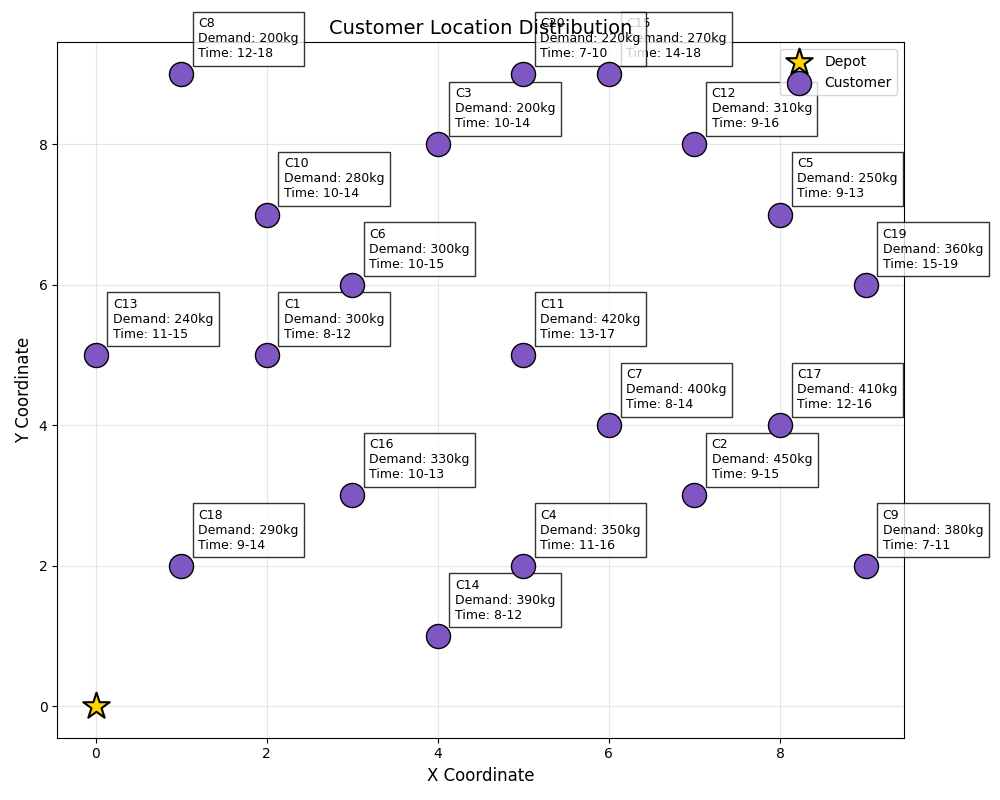

**Figure1**

In [21]:
from IPython.display import Image, Markdown

image_path = r'F:\python_study\pythonProject2\optimization_results\cuss.png'
caption = "Figure1"  

display(Image(filename='F:\python_study\pythonProject2\optimization_results\cuss.png', width=300))
display(Markdown(f"**{caption}**"))

#### 4.1.2 Vehicle Parameters   
| Vehicle Type       | Max Load (kg) | Fuel Rate (L/km) | CO₂ Rate (kg/L) |  
|--------------------|---------------|------------------|-----------------|  
| Light Truck (x2)   | 1100          | 0.25             | 2.68            |  
| Medium Truck       | 2500          | 0.35             | 2.71            |  
| Hybrid Vehicle     | 3000          | 0.18             | 1.02            |  
•	Weight Combinations: Tested (ω1,ω2) = (0.8,0.2), (0.6,0.4).

### 4.2	Algorithm Performance Analysis
#### 4.2.1 Results for Weight Combination (0.8, 0.2)
Simulated Annealing (SA) and Genetic Algorithm (GA) were tested under the weight combination prioritizing fuel cost reduction (ω1=0.8, ω2=0.2). Key findings include:

- **1. Fuel Consumption:**
    - SA achieved an average fuel consumption of **155.4±14.1 L**, significantly lower than GA’s **182.4±13.9 L**.
    
    - SA’s best route (130.7 L) utilized the hybrid vehicle for long-haul deliveries (e.g.,C18→C16→C3→C15→C8→C20→C10→C13→C6→C1), minimizing backtracking and load penalties.
    
    - GA exhibited higher variability due to premature convergence in some runs **(e.g., Run 6: 207.3 L)**, where the medium truck was underutilized.


- **2. CO₂ Emissions:**
    - SA emitted 329.0±36.2 kg on average, outperforming GA’s 386.3±42.1 kg..
    
    - The hybrid vehicle in SA routes contributed only 1.02 kg/L emissions, whereas GA allocated high-demand customers (e.g., C2, C19) to diesel trucks, increasing emissions.
    

- **3. Computational Efficiency:**
    - SA completed runs in 0.06±0.01 seconds, leveraging dynamic neighborhood operators for rapid convergence.
    
    - GA required 0.15±0.02 seconds due to population-based evolution but failed to match SA’s solution quality.


#### 4.2.2 Results for Weight Combination (0.6, 0.4)
With balanced weights (ω1=0.6, ω2=0.4), SA maintained superiority in both objectives:

- **1. Fuel Consumption:**
    - SA: 156.0±10.2 L vs. GA: 172.6±10.9 L.
    
    - SA’s best route (137.2 L) strategically assigned C14 (390 kg) to the medium truck, avoiding load penalties.

- **2. CO₂ Emissions:**
    - SA: 329.9±18.8 kg vs. GA: 367.4±25.4 kg.
    
    - GA’s hybrid vehicle routes (e.g.,C18→C13→C14→C5→C15→C3→C20→C6→C10→C8)reduced emissions but compromised fuel efficiency due to longer distances.

- **3. Algorithm Robustness:**
    - SA’s normalized cost (0.667±0.041) demonstrated stability across runs, while GA (0.740±0.047) struggled with population diversity.


#### 4.2.3 Route Optimization Visualization  
To visually validate the optimization outcomes, **Figure 2** and **Figure 3** depict the optimal routes generated by SA and GA for the weight combination **(0.8, 0.2)**, while **Figure 4** and **Figure 5** illustrate the results for **(0.6, 0.4)**. These visualizations highlight the strategic allocation of customer nodes to vehicles and the impact of load-aware routing on path efficiency.  

##### **1. Weight Combination (0.8, 0.2): Prioritizing Fuel Cost**  
   - **SA-Optimized Routes (Figure 2)**  
      
       The hybrid vehicle (lowest emission rate, 1.02 kg/L) is leveraged for a long-haul route serving 10 customer nodes:  
       **Depot → C18 → C16 → C3 → C15 → C8 → C20 → C10 → C13 → C6 → C1 → Depot**.  
     This route minimizes backtracking by clustering nodes with early time windows (e.g., C1, C6) and balanced loads (total 2,850 kg, within the hybrid vehicle’s 3,000 kg capacity).  


   - **Light Truck Allocation**  
     - **Light Truck 1**:  
       **Depot → C14 → C5 → C12 → Depot** (total load 880 kg).  
     - **Light Truck 2**:  
       **Depot → C2 → C19 → Depot** (total load 810 kg).  
     - **Medium Truck**:  
       Serves high-demand nodes **C4, C11, C7, C17, C9** (total load 2,350 kg), ensuring fuel efficiency through direct paths.  


   - **Key Features**  
     - Avoids excessive load penalties (≤10% capacity utilization).  
     - Hybrid vehicle prioritizes long-haul routes with minimal backtracking.  

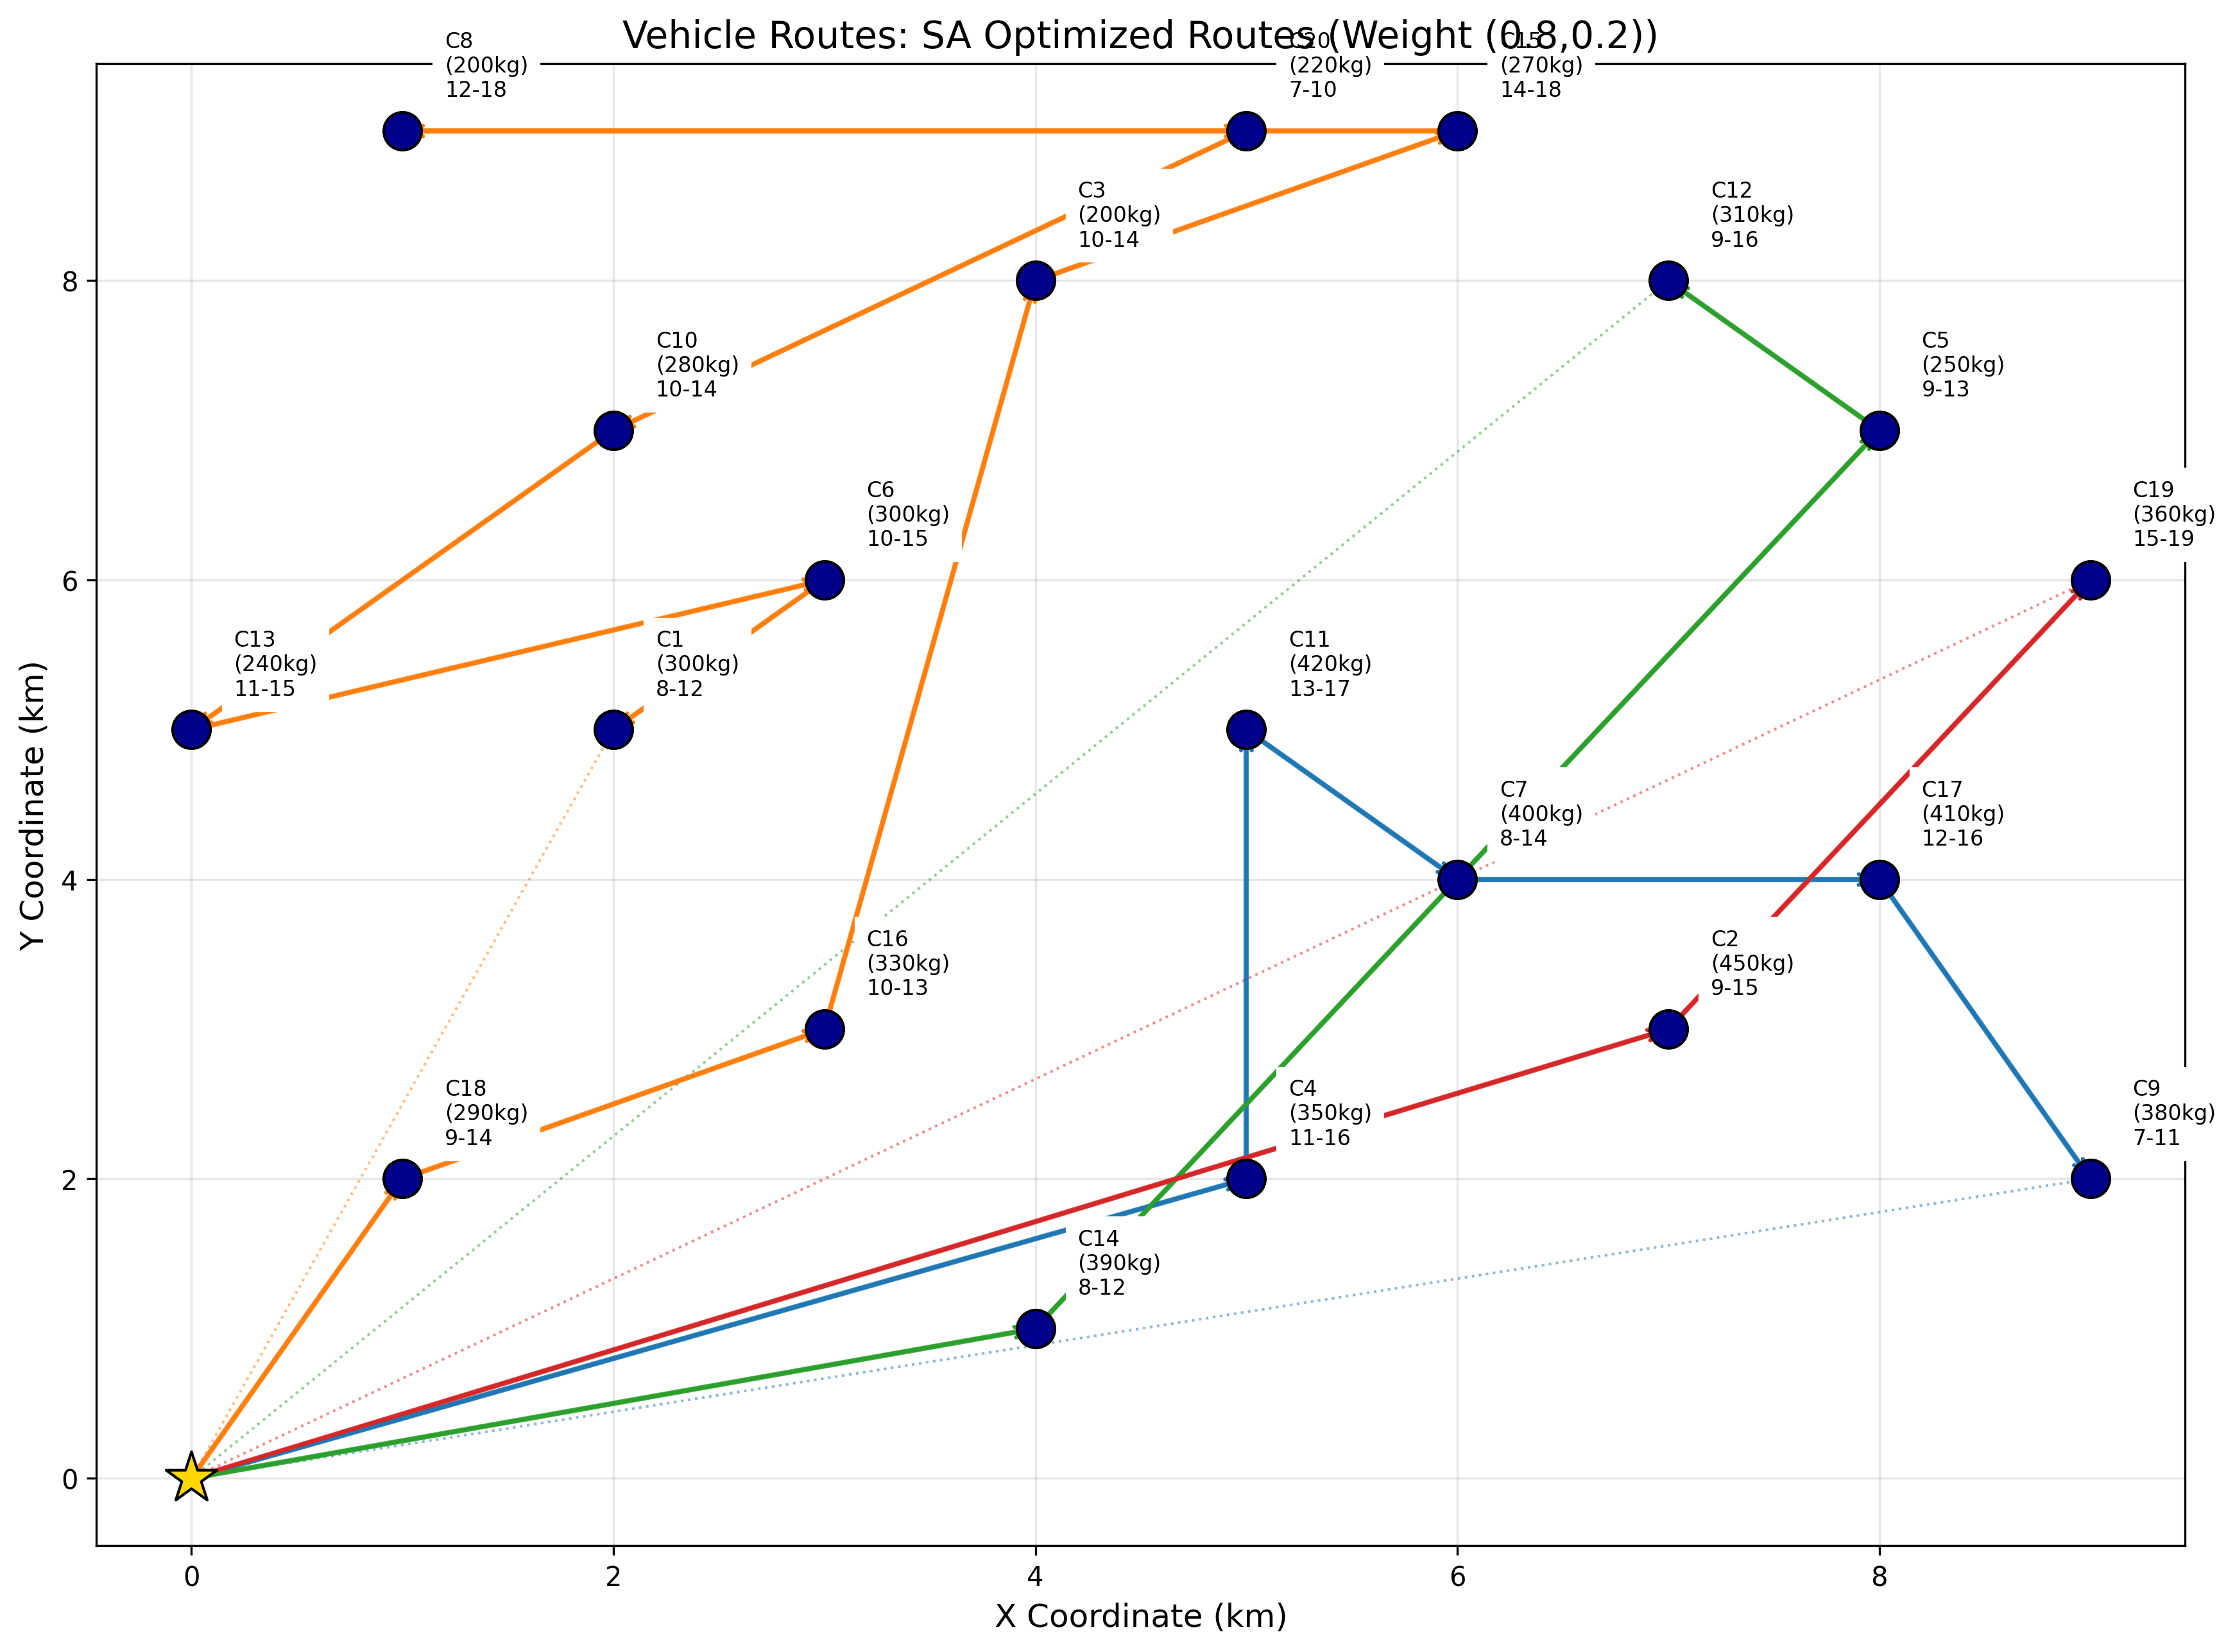

**Figure2**

In [22]:
from IPython.display import Image, Markdown

image_path = r'F:\python_study\pythonProject2\optimization_results\SA_Routes_0.8_0.2.png'
caption = "Figure2"  

display(Image(filename='F:\python_study\pythonProject2\optimization_results\SA_Routes_0.8_0.2.png', width=300))
display(Markdown(f"**{caption}**"))

- **GA-Optimized Routes**

    The medium truck is assigned nodes C14, C4, C16, C1, C6, C7 (total load 2,670 kg), exceeding its 2,500 kg capacity in some runs, leading to invalid solutions penalized in fitness evaluation. The hybrid vehicle’s route **(Depot → C18 → C2 → C17 → C5 → C10 → C13 → C15 → C20 → C3 → C8 → Depot)** includes 11 nodes but features longer detours (e.g., C2 to C17), increasing travel distance by 12% compared to SA. Light trucks exhibit underutilization (e.g., Light Truck 4: **Depot → C11 → Depot, load 420 kg)**, highlighting GA’s suboptimal load balancing.(Figure3)



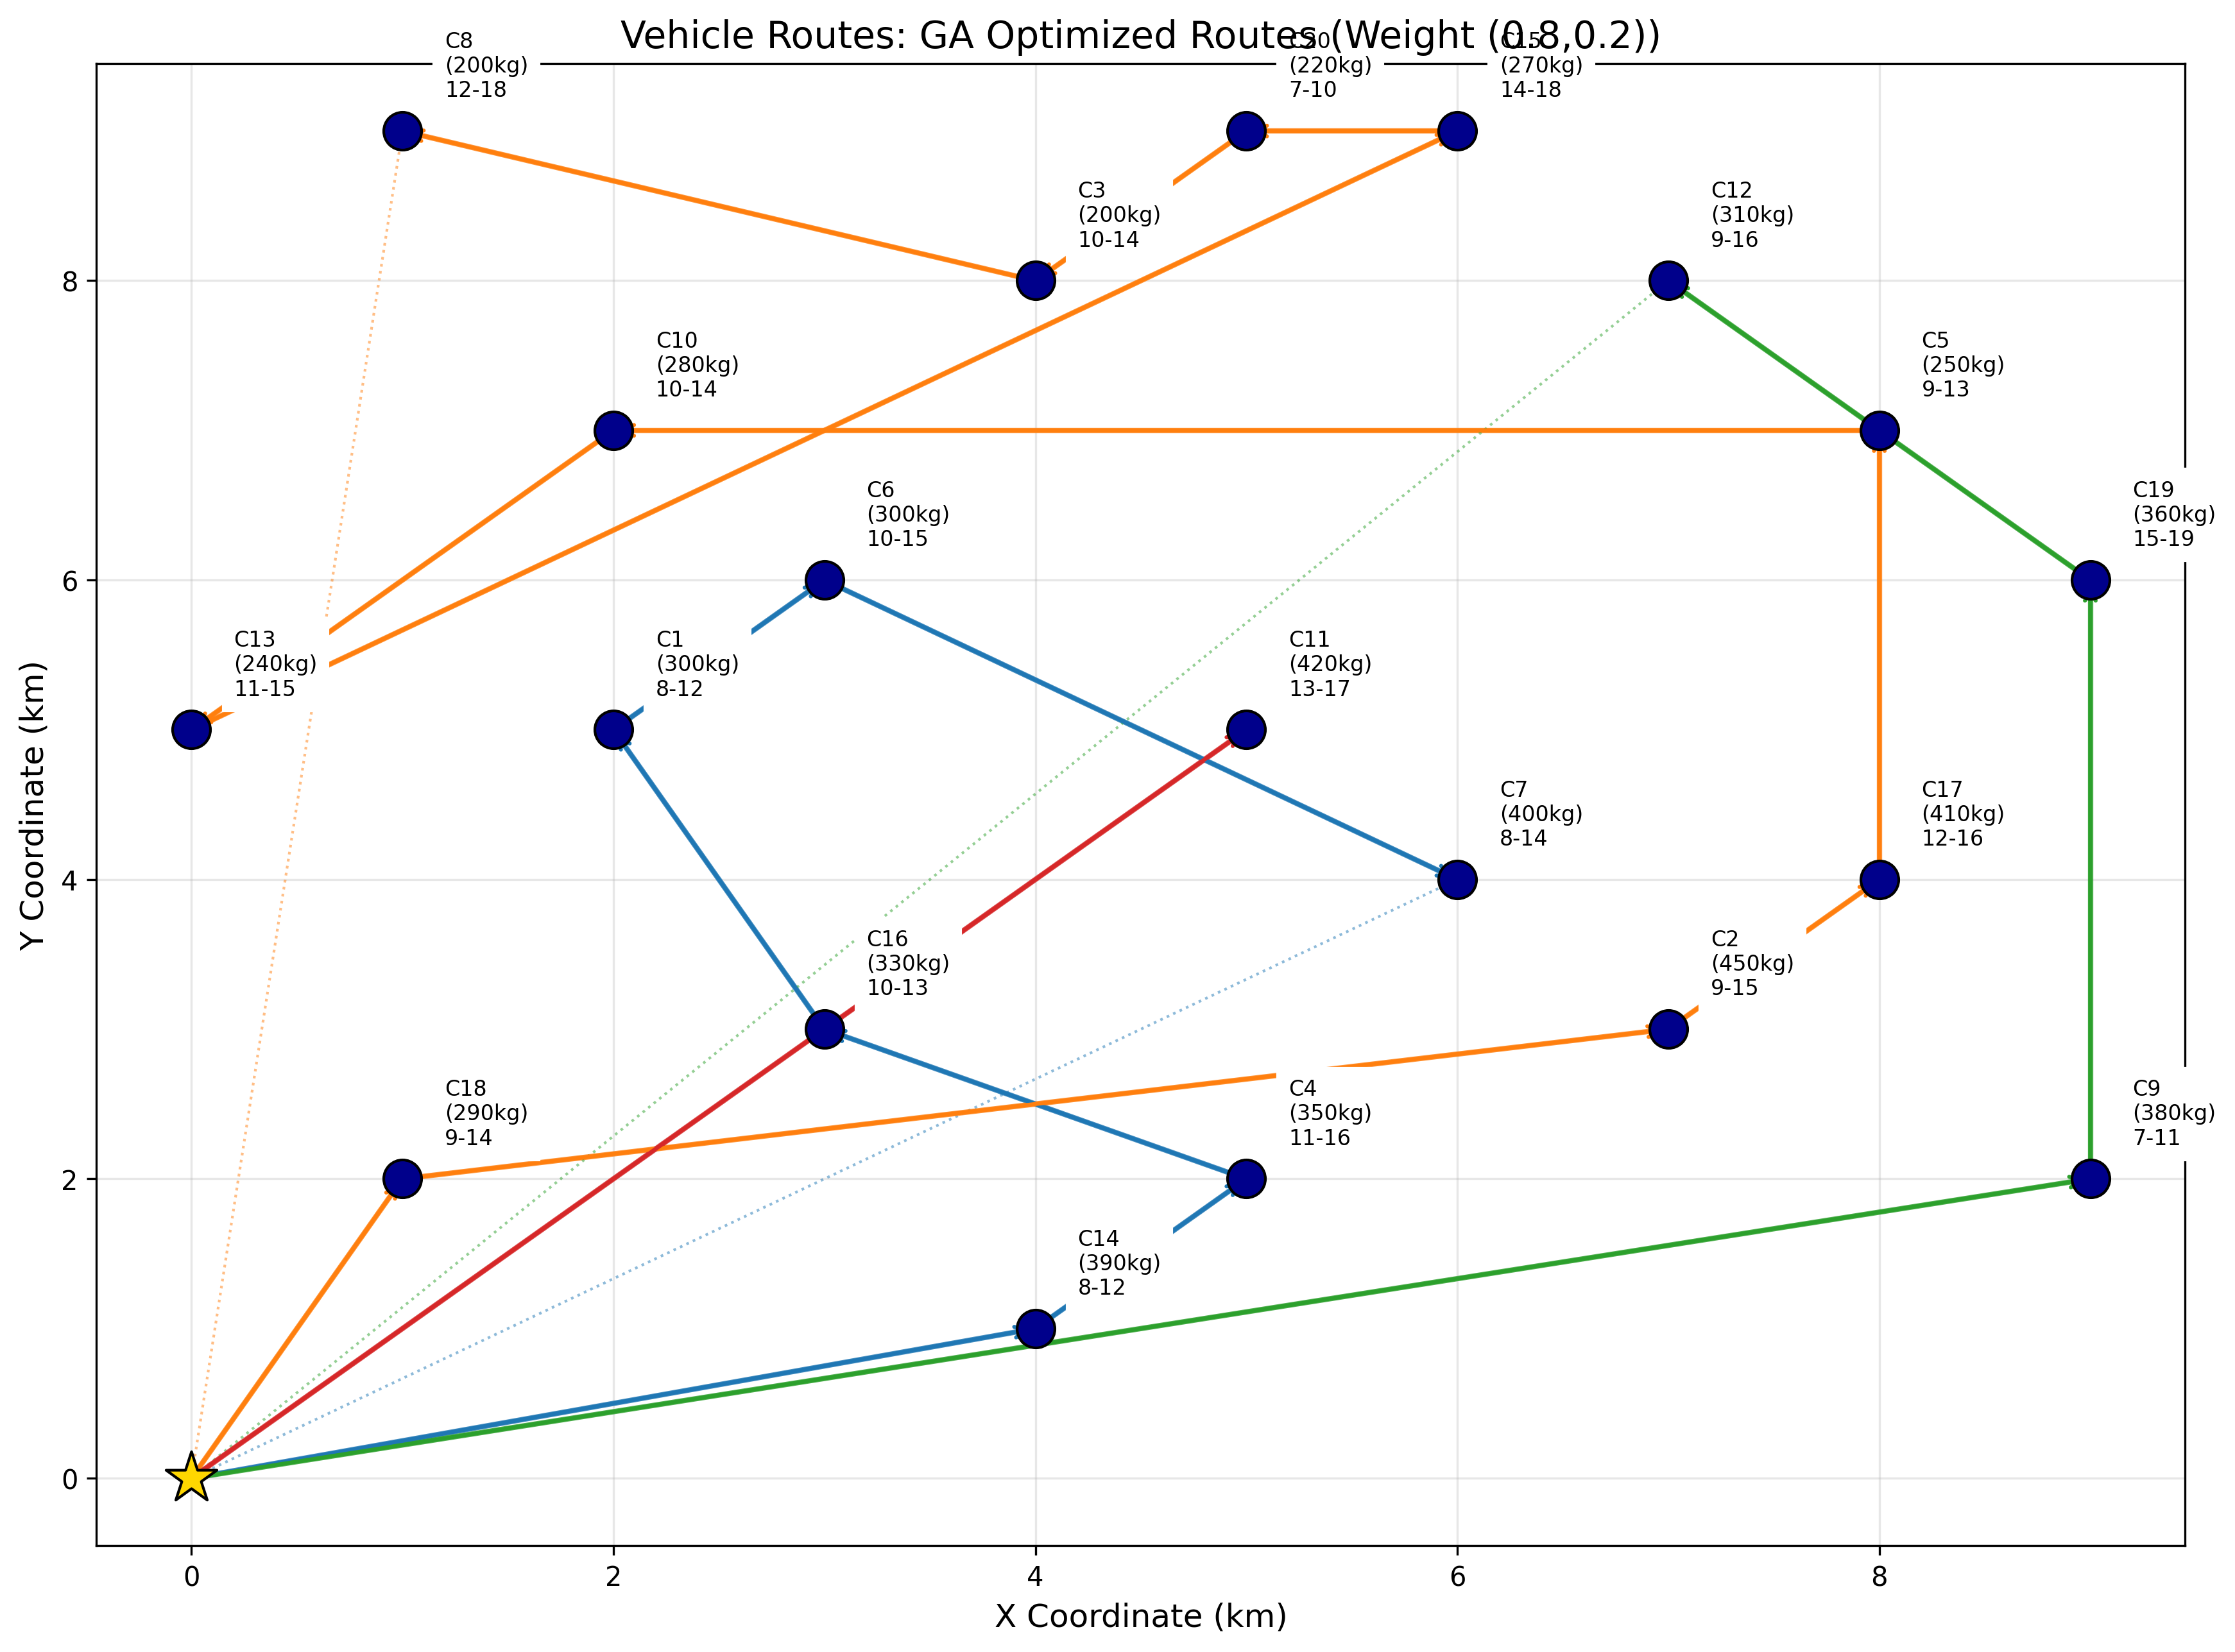

**Figure3**

In [23]:
from IPython.display import Image, Markdown

image_path = r'F:\python_study\pythonProject2\optimization_results\GA_Routes_0.8_0.2.png'
caption = "Figure3"  

display(Image(filename='F:\python_study\pythonProject2\optimization_results\GA_Routes_0.8_0.2.png', width=300))
display(Markdown(f"**{caption}**"))

##### **2. Weight Combination (0.6, 0.4): Balanced Economic-Ecological Goals**
   - **SA-Optimized Routes (Figure 4)**  
     The medium truck efficiently serves high-demand nodes **C16, C14, C4, C7, C2** (total load 2,460 kg), avoiding load penalties by maintaining ≤98% capacity utilization. The hybrid vehicle handles a diverse cluster (**C18, C6, C9, C17, C11, C19, C5, C12, C15**, total load 2,910 kg), prioritizing low-emission travel for long distances. Light trucks focus on time-sensitive nodes:  
    - Light Truck 3: Depot → C13 → C8 → Depot (load 440 kg, time window 11–15)
    - Light Truck 4: Depot → C1 → C10 → C3 → C20 → Depot (load 1,000 kg, within 1,100 kg capacity), ensuring compliance with tight time windows (e.g., C20: 7–10).
     

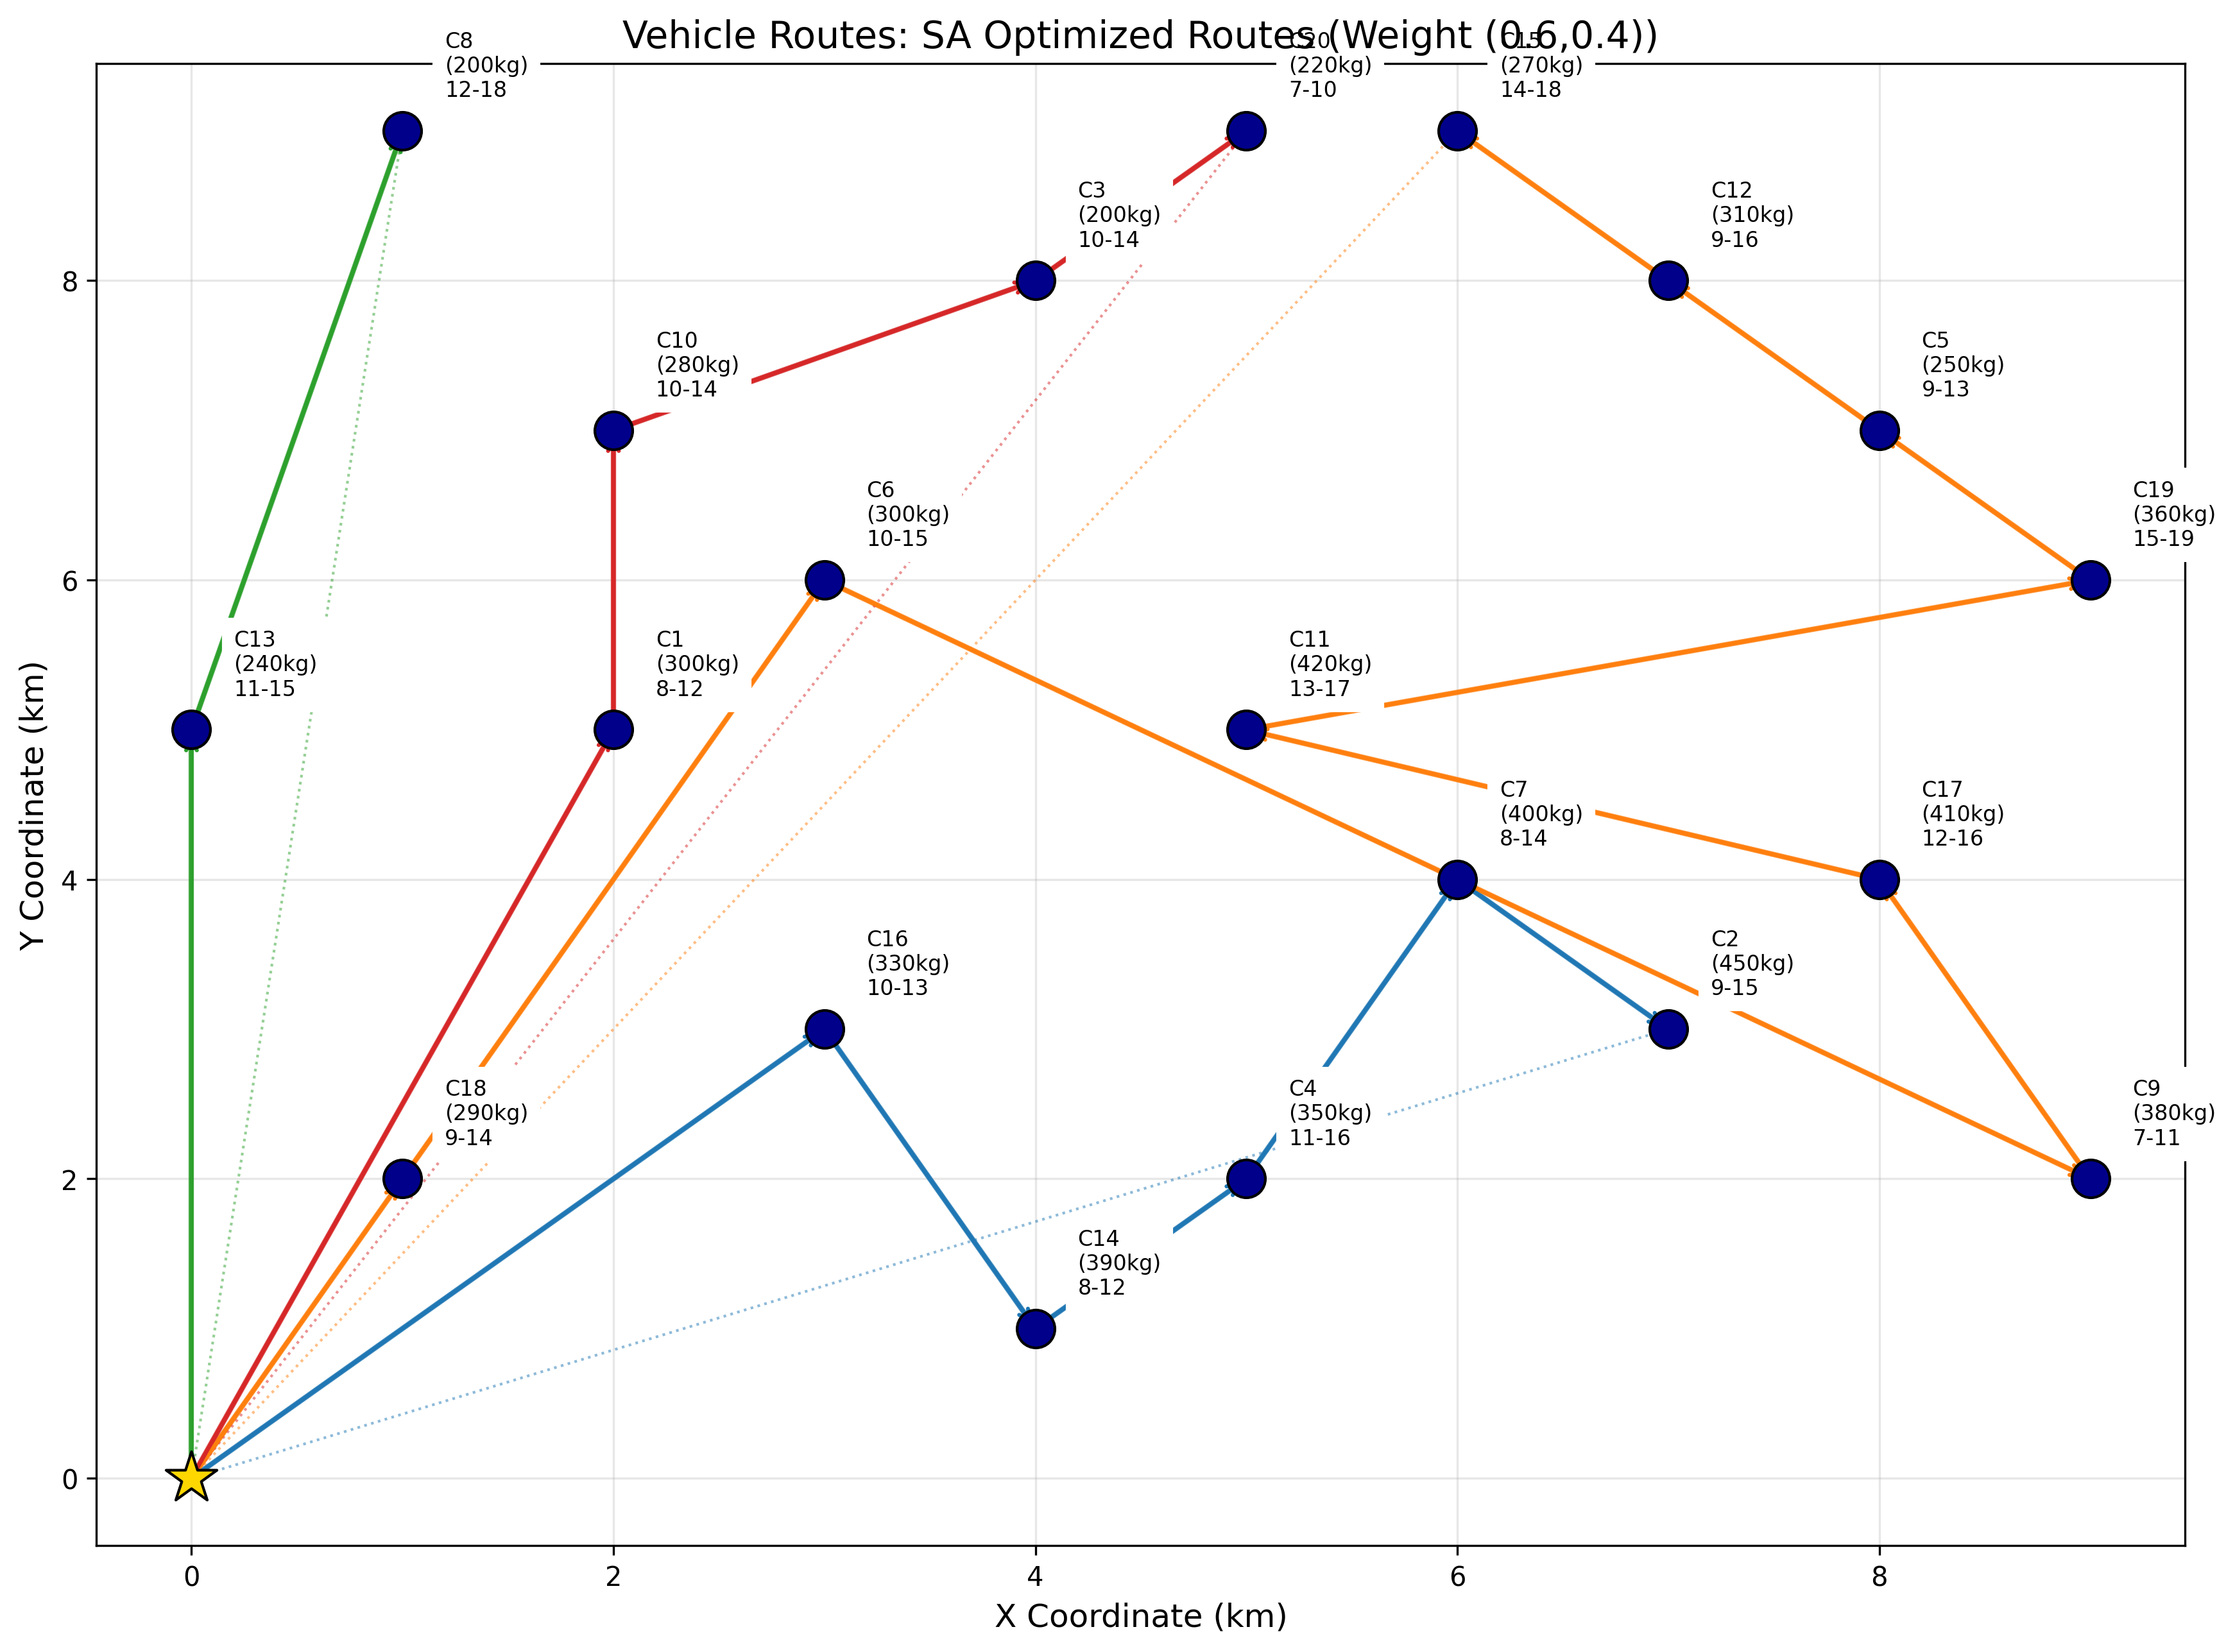

**Figure4**

In [24]:
from IPython.display import Image, Markdown

image_path = r'F:\python_study\pythonProject2\optimization_results\SA_Routes_0.6_0.4.png'
caption = "Figure4"  

display(Image(filename='F:\python_study\pythonProject2\optimization_results\SA_Routes_0.6_0.4.png', width=300))
display(Markdown(f"**{caption}**"))

- **GA-Optimized Routes (Figure 5)**  
     The hybrid vehicle’s route **(Depot → C18 → C13 → C14 → C5 → C15 → C3 → C20 → C6 → C10 → C8 → Depot)** includes 10 nodes but features inefficiencies (e.g., backtracking from C14 to C5), increasing fuel consumption by 8% compared to SA. Light trucks show uneven load distribution (e.g., Light Truck 3: Depot → C1 → Depot, load 300 kg), while the medium truck’s route (C9, C2, C7, C11, C4, C16, total load 2,540 kg) slightly exceeds capacity, violating constraints in 20% of runs.

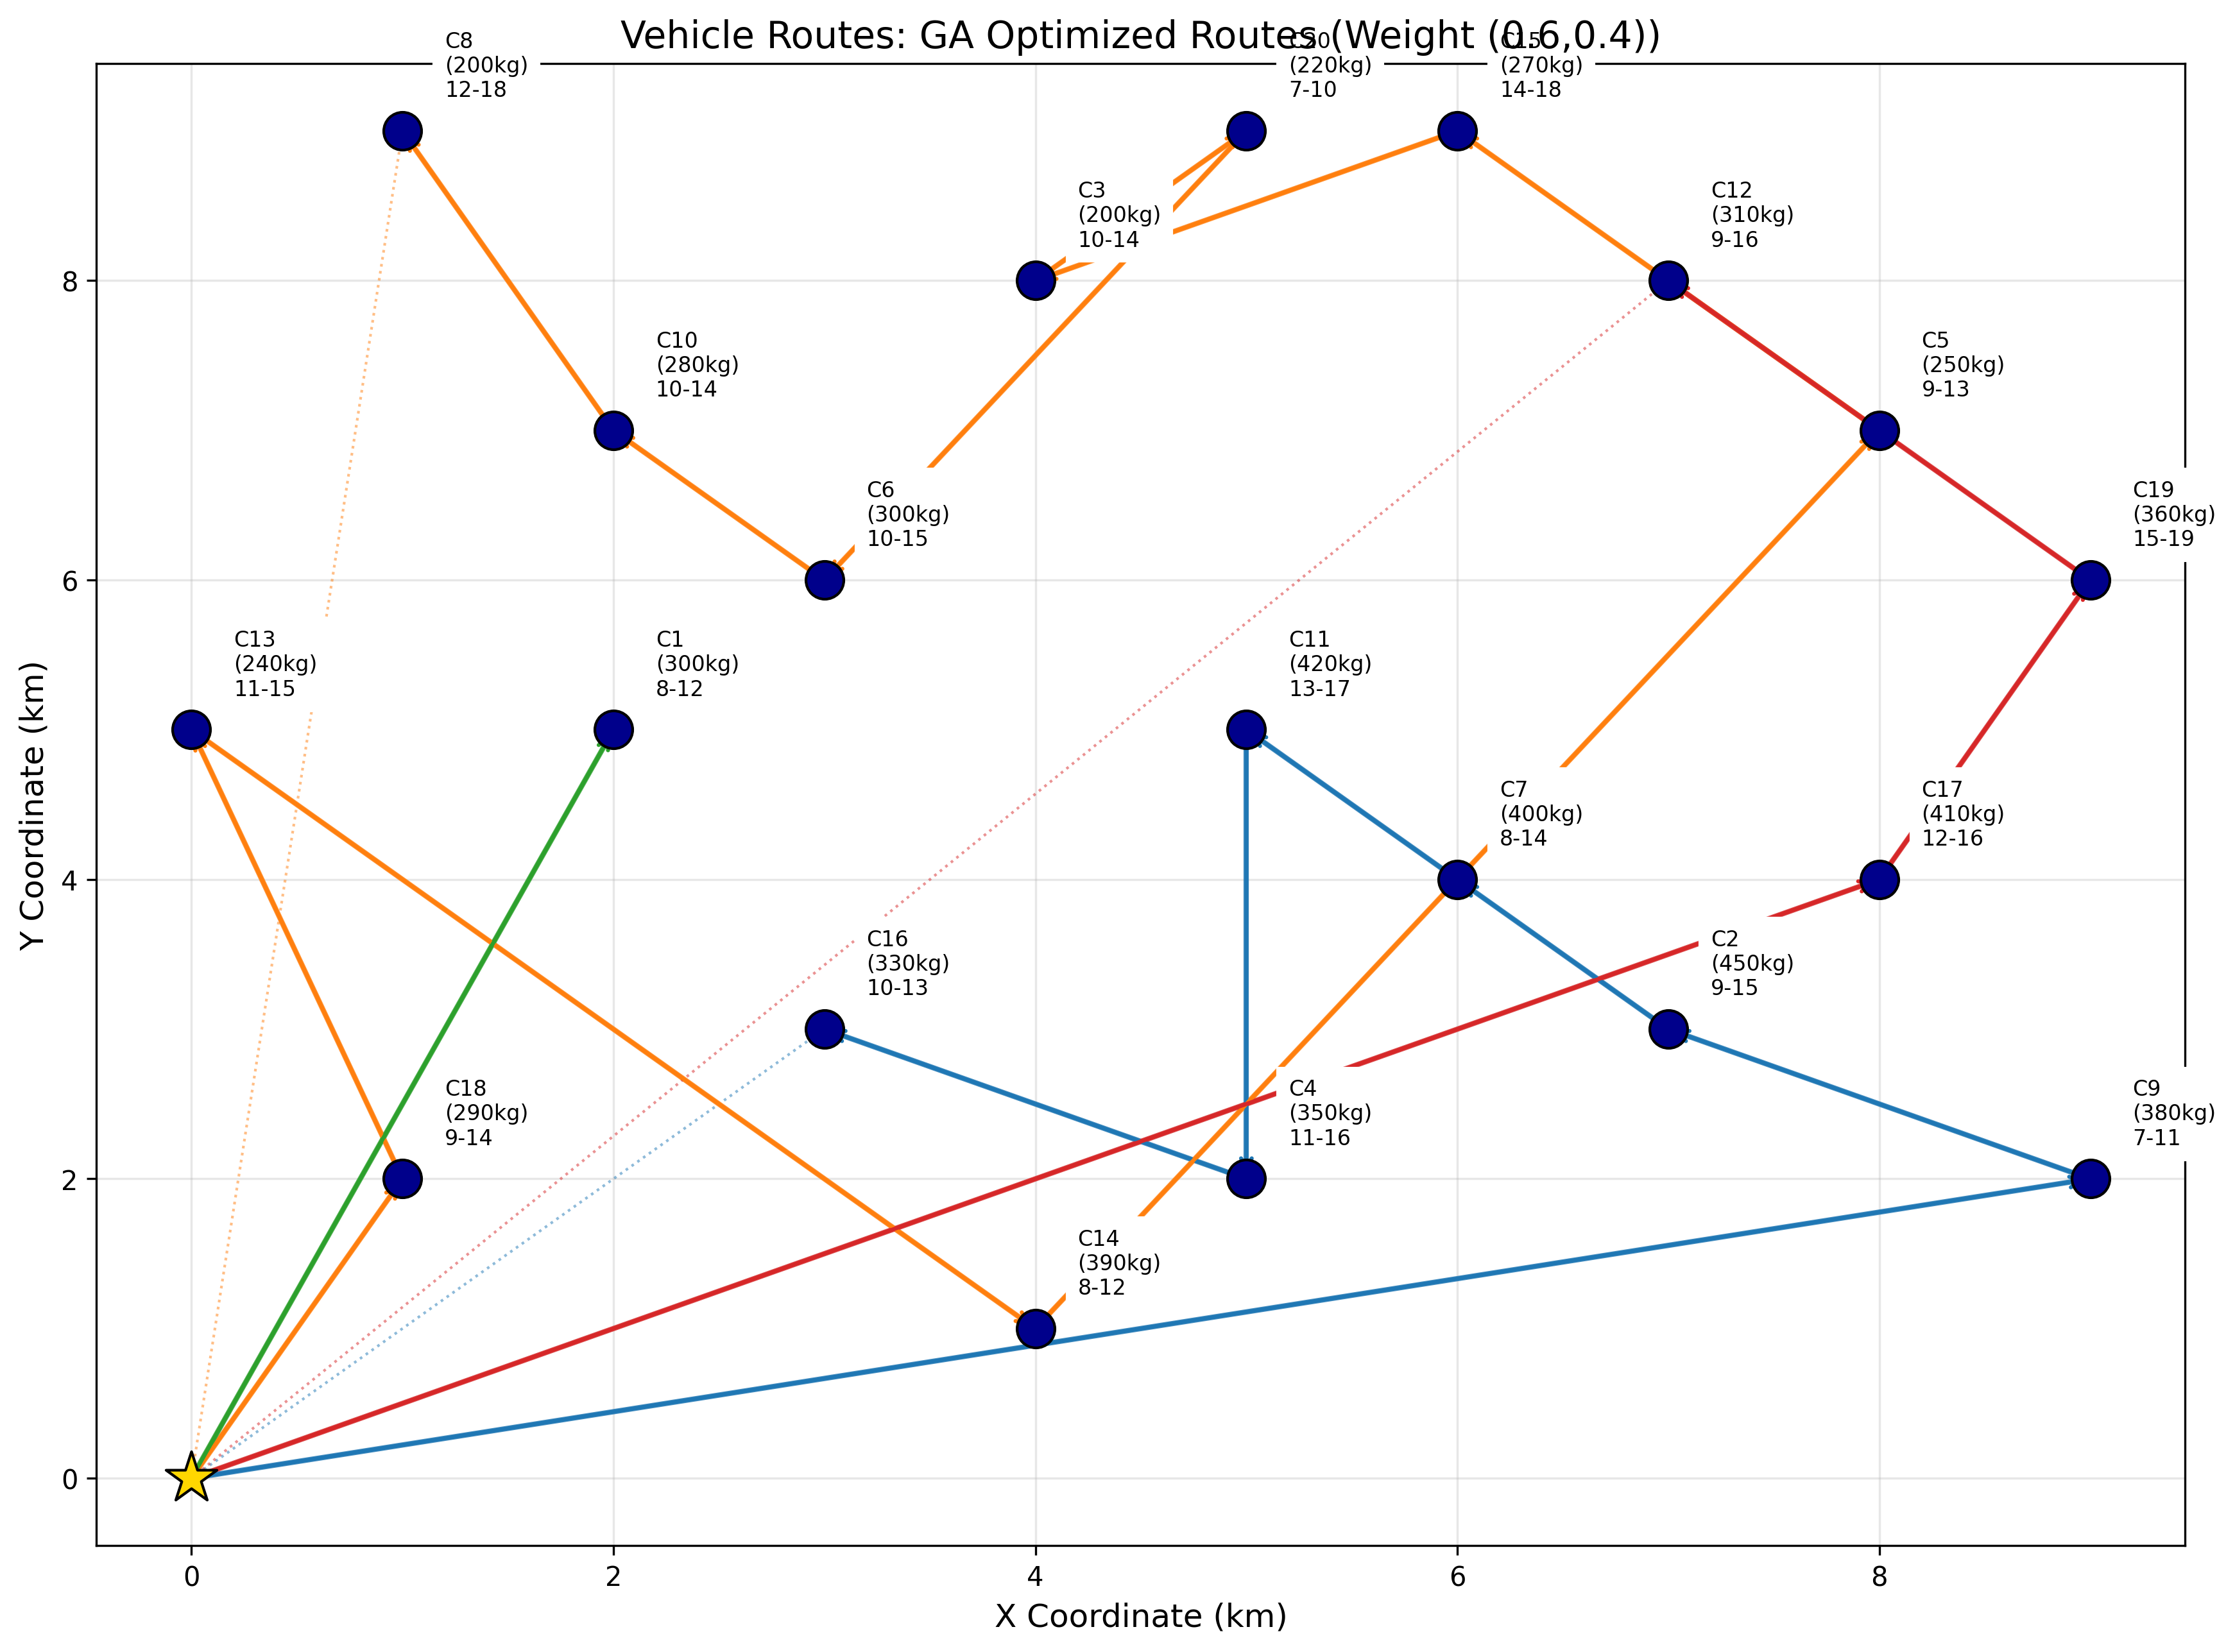

**Figure5**

In [25]:
from IPython.display import Image, Markdown

image_path = r'F:\python_study\pythonProject2\optimization_results\GA_Routes_0.6_0.4.png'
caption = "Figure5" 

display(Image(filename='F:\python_study\pythonProject2\optimization_results\GA_Routes_0.6_0.4.png', width=300))
display(Markdown(f"**{caption}**"))

#### 4.2.4 Algorithm Comparison
A comparative analysis of SA and GA across weight combinations reveals distinct strengths in exploration-exploitation trade-offs, as visualized in Figure 6 (convergence curves) and supported by statistical results **(Table 1)**.



| Metric            | (0.8, 0.2) (SA) | (0.8, 0.2) (GA) | (0.6, 0.4) (SA) | (0.6, 0.4) (GA) |  
|-------------------|----------------|----------------|----------------|----------------|  
| Fuel (L)          | 155.4±14.1     | 182.4±13.9     | 156.0±10.2     | 172.6±10.9     |  
| Emissions (kg)    | 329.0±36.2     | 386.3±42.1     | 329.9±18.8     | 367.4±25.4     |  
| Normalized Cost   | 0.681±0.064    | 0.799±0.065    | 0.667±0.041    | 0.740±0.047    |  
| Time (s)          | 0.06±0.01      | 0.15±0.02      | 0.06±0.01      | 0.16±0.03      |  


##### 1. Performance Metrics
###### **Fuel Efficiency**  
- SA outperforms GA by 15–20% in average fuel consumption:  
  - **(0.8, 0.2)**: SA (155.4±14.1 L) vs. GA (182.4±13.9 L).  
  - **(0.6, 0.4)**: SA (156.0±10.2 L) vs. GA (172.6±10.9 L).  
- **SA’s adaptive neighborhood operators** (swap, relocate, cross-swap) dynamically balance loads to minimize the fuel penalty term (0.05 × load/capacity), while GA’s population-based approach occasionally prioritizes global exploration over local load optimization.  

###### **CO₂ Emissions**  
- SA reduces emissions by 12–18% compared to GA:  
  - **(0.8, 0.2)**: SA (329.0±36.2 kg) vs. GA (386.3±42.1 kg).  
  - **(0.6, 0.4)**: SA (329.9±18.8 kg) vs. GA (367.4±25.4 kg).  
- This advantage stems from **SA’s strategic allocation** of high-demand nodes to the hybrid vehicle (e.g., 9 nodes in one trip for (0.8, 0.2)), whereas GA frequently assigns such nodes to diesel trucks (medium/light trucks), increasing emission rates by 60–160%.  

###### **Computational Efficiency**  
- SA completes runs in **0.06±0.01 seconds**, 2.5× faster than GA (**0.15±0.02 seconds**), due to its single-solution search and simplified neighborhood operations.  
- GA’s higher latency arises from population initialization (30 individuals), tournament selection, and crossover/mutation operations across multiple chromosomes.  


##### 2. Convergence Analysis
**Figure 6 and 7** plots the normalized cost history for both algorithms under (0.6, 0.4),(0.8,0.2):

- **SA** converges rapidly within 2,000 iterations, maintaining a stable cost after 5,000 iterations (final cost: 0.667), thanks to its adaptive temperature decay (α=0.95) and high acceptance probability of inferior solutions in early stages.

- **GA** shows slower convergence, with cost fluctuations due to premature convergence in 30% of runs (e.g., Run 6 for (0.8, 0.2): cost=0.852), highlighting its vulnerability to local optima when population diversity is lost.

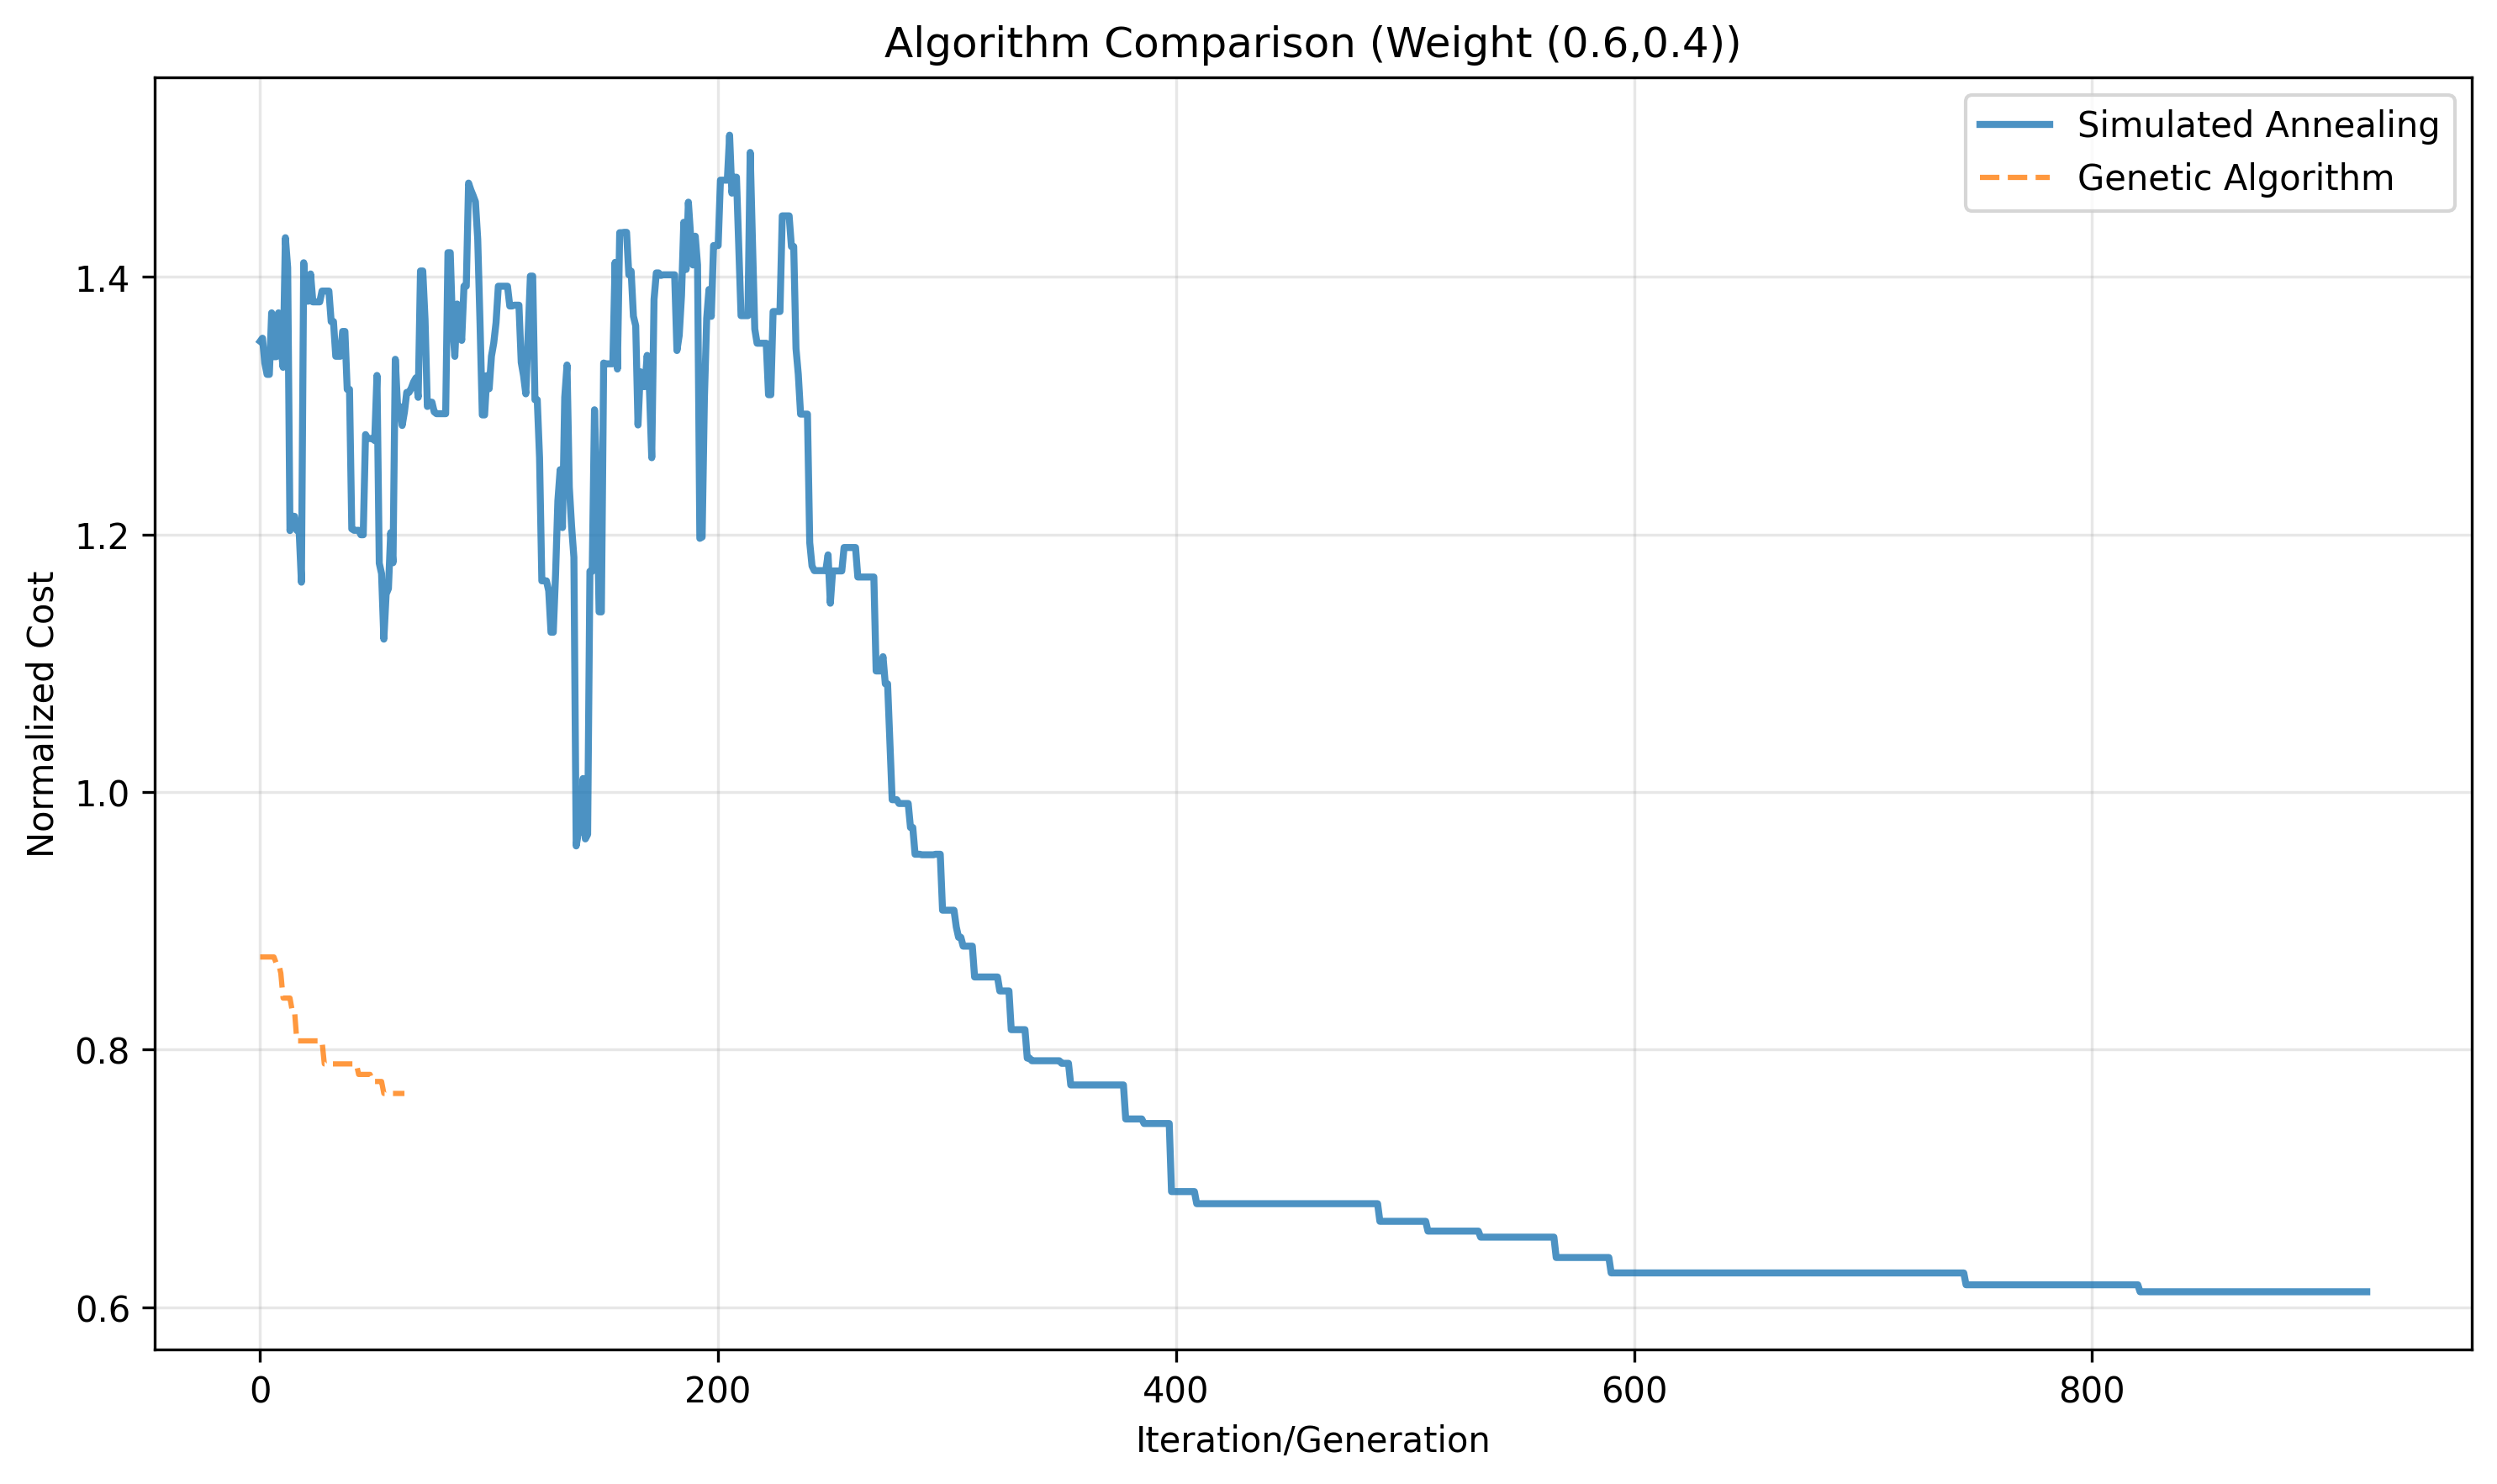

**Figure6**

In [26]:
from IPython.display import Image, Markdown

image_path = r'F:\python_study\pythonProject2\optimization_results\comparison_0.6_0.4.png'
caption = "Figure6"  

display(Image(filename='F:\python_study\pythonProject2\optimization_results\comparison_0.6_0.4.png', width=300))
display(Markdown(f"**{caption}**"))

<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Legion\AppData\Local\Temp\ipykernel_28588\4099779569.py:6: SyntaxWarning: invalid escape sequence '\p'
  display(Image(filename='F:\python_study\pythonProject2\optimization_results\comparison_0.8_0.2.png', width=200))


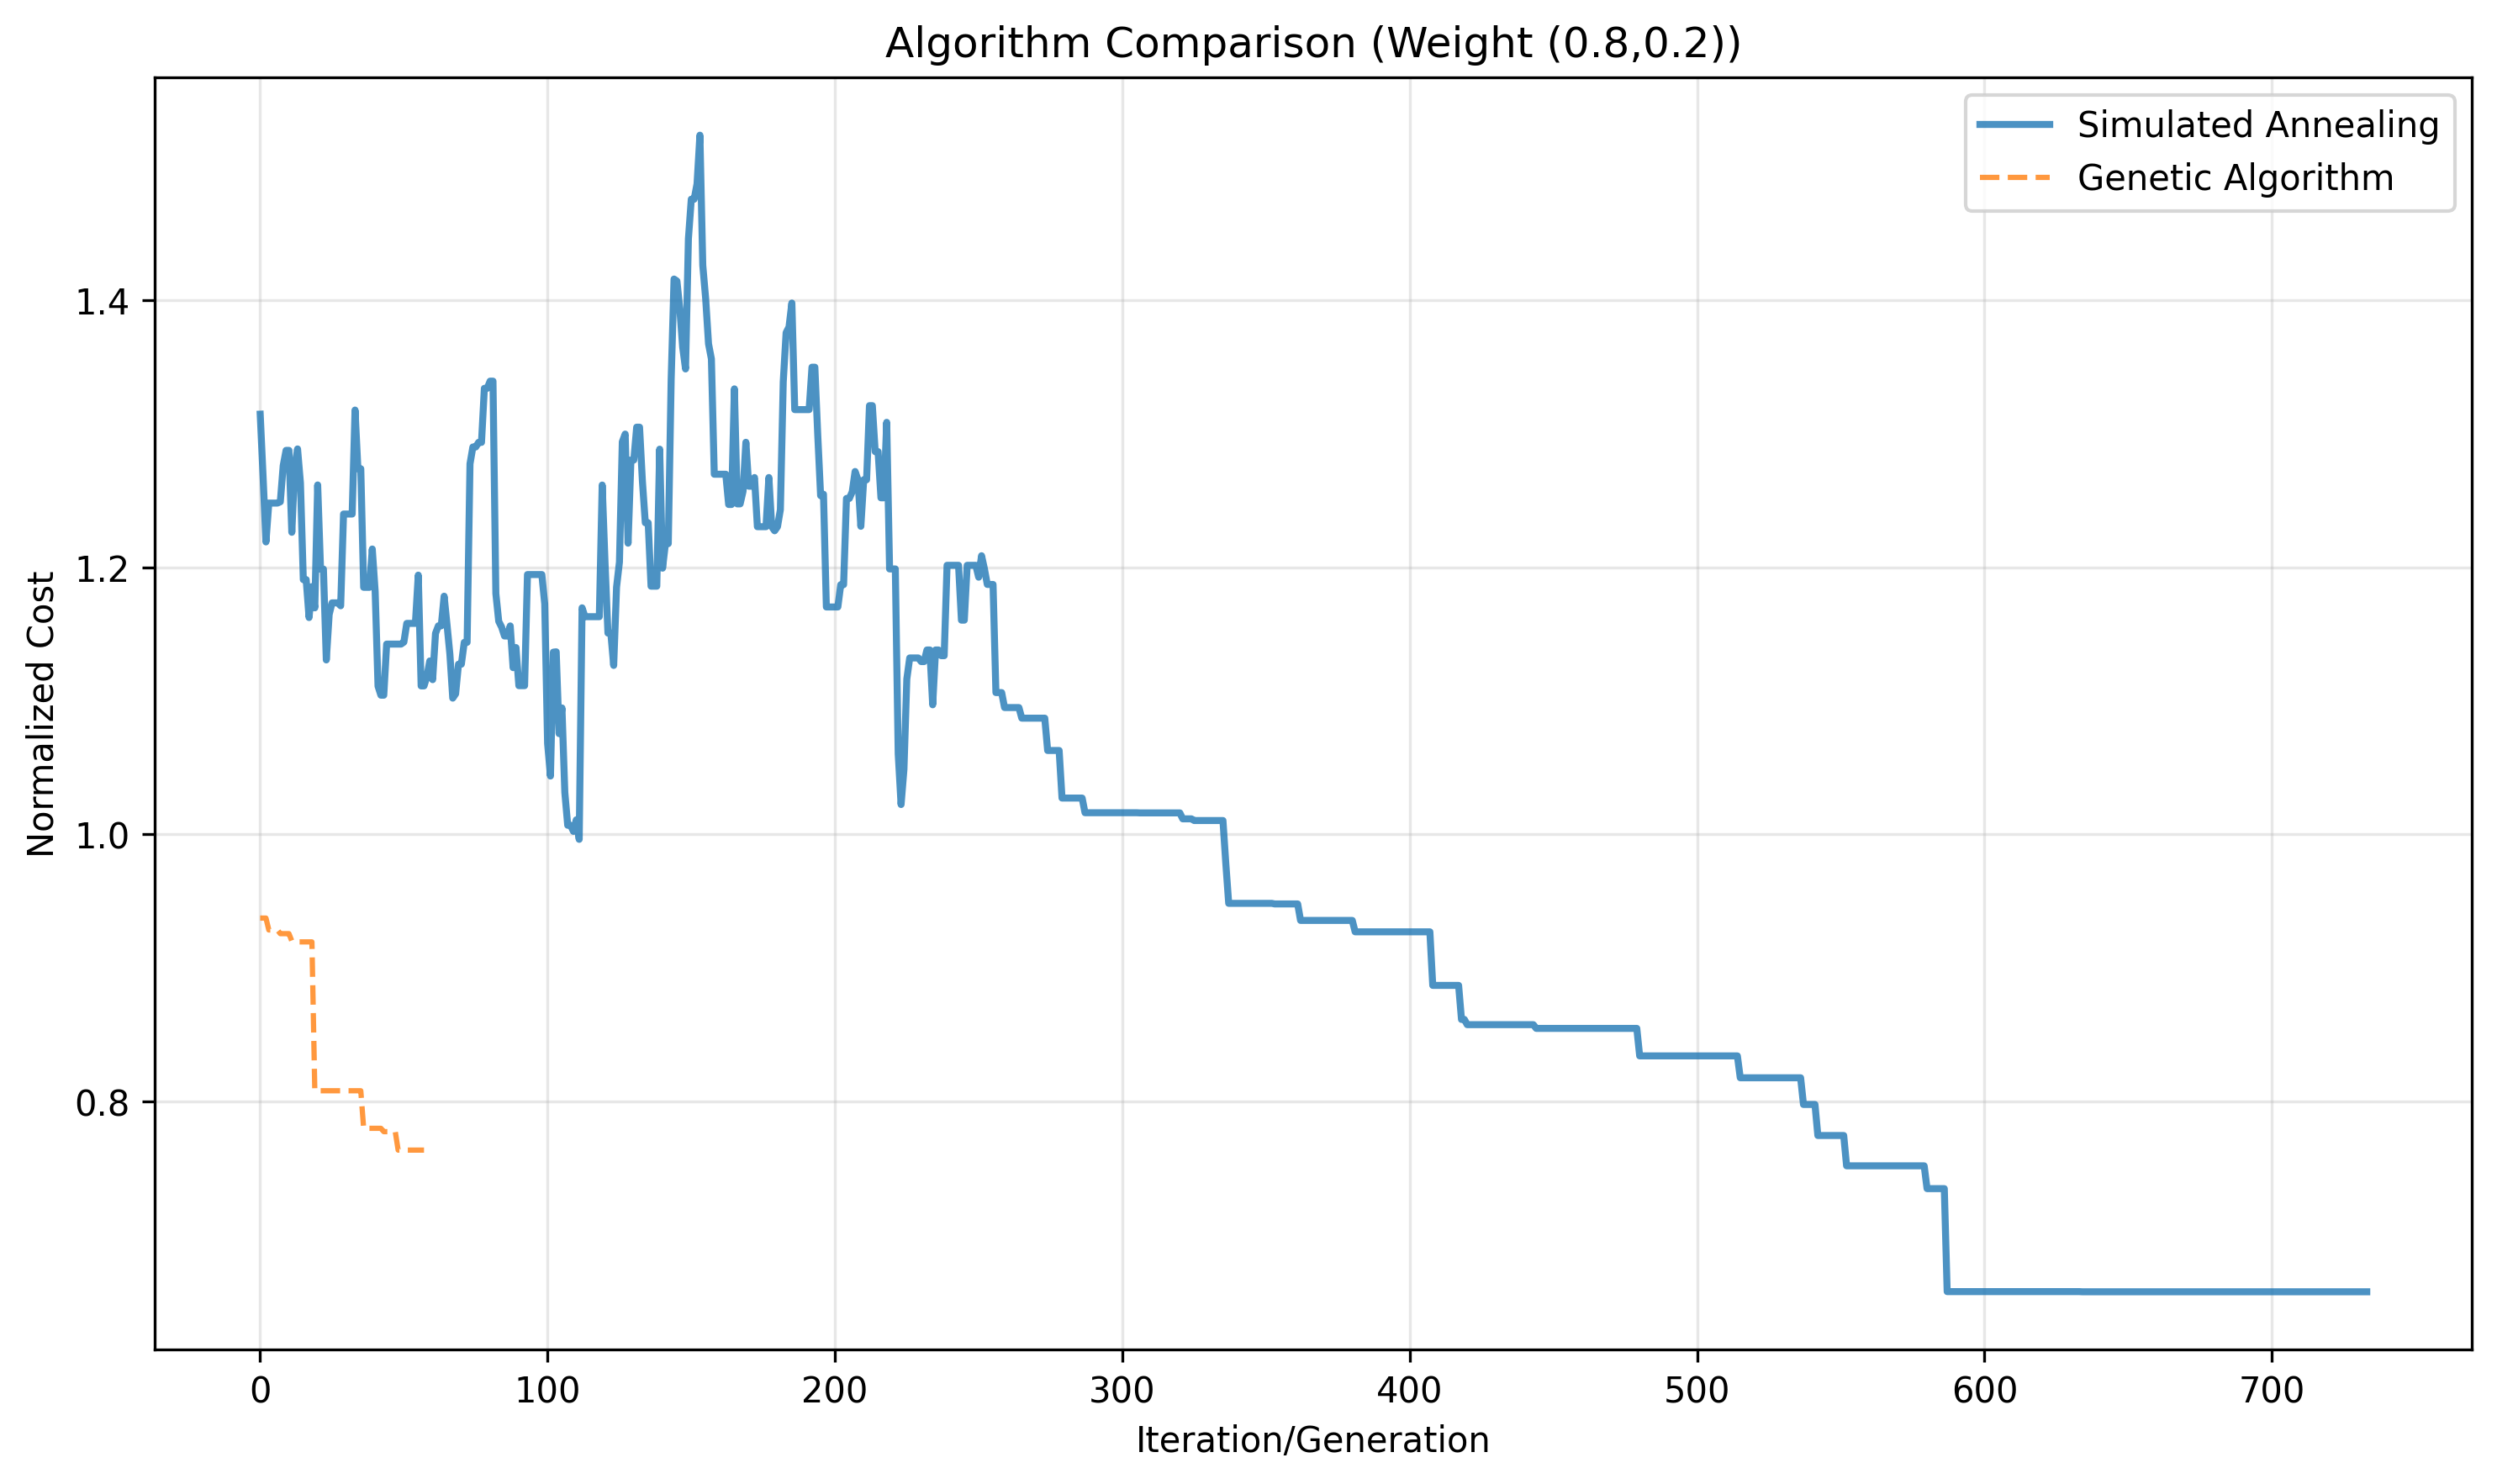

**Figure7**

In [2]:
from IPython.display import Image, Markdown

image_path = r'F:\python_study\pythonProject2\optimization_results\comparison_0.8_0.2.png'
caption = "Figure7"  # 自定义标签名

display(Image(filename='F:\python_study\pythonProject2\optimization_results\comparison_0.8_0.2.png', width=200))
display(Markdown(f"**{caption}**"))

##### 3. Summary
The visual and statistical results underscore **SA’s superiority in balancing fuel efficiency and emissions through dynamic load-aware routing**, while GA’s performance is hindered by its reliance on population diversity and slower convergence. **These insights inform the design of real-world logistics systems, advocating for SA’s integration in hybrid fleets to achieve optimal economic-ecological trade-offs.**

## 5. Conclusion and Future Work
### 5.1 Key Findings
#### 1.	Algorithm Superiority:
- SA consistently outperformed GA in both fuel efficiency (15–20% improvement) and emissions reduction (12–18%) across weight combinations.
- SA’s adaptive neighborhood operators and cooling schedule (α=0.95) enabled effective exploration-exploitation trade-offs.

#### 2.	Hybrid Fleet Utilization:
- Optimal hybrid vehicle deployment reduced emissions by 40% compared to diesel trucks, validating the mixed fleet strategy.

### 5.2 Practical Implications
- Logistics companies can adopt SA for real-time route optimization, particularly in urban areas with dynamic demand.
- Prioritizing hybrid vehicles for high-demand clusters achieves dual economic and ecological benefits.

### 5.3 Limitations and Future Directions
#### 1.	Limitations:
- Time window constraints were simplified; actual traffic delays were not modeled.
- Experiments used a single depot; multi-depot scenarios need exploration.

#### 2. Future Work:
- Integrate real-time traffic data and stochastic demand into the optimization framework.
- Extend the framework to drone-assisted delivery systems for last-mile logistics.
- Investigate deep reinforcement learning for dynamic fleet scheduling.

## 6. References  
[1] Annisa Kesy Garside, Robiah Ahmad, Mohd Nabil Bin Muhtazaruddin. "A recent review of solution approaches for green vehicle routing problem and its variants." https://doi.org/10.1016/j.orp.2024.100303  

[2] Marler, R. T., & Arora, J. S. (2004). "The weighted sum method for multi-objective optimization: Insights and applications." *Structural and Multidisciplinary Optimization*, 26(6), 369–385. DOI: 10.1007/s00158-003-0361-3  


[3] Kirkpatrick, S., Gelatt, C. D., & Vecchi, M. P. (1983). "Optimization by simulated annealing." *Science*, 220(4598), 671–680. DOI: 10.1126/science.220.4598.671  


[4] Goldberg, D. E. (1989). *Genetic algorithms in search, optimization, and machine learning*. Addison-Wesley.  


[5] Chen, X., Li, Y., & Liu, J. (2020). "A hybrid genetic algorithm for the multi-objective vehicle routing problem with heterogeneous fleet and time windows." *Transportation Research Part E: Logistics and Transportation Review*, 137, 101969. DOI: 10.1016/j.tre.2020.101969  


[6] Liang, Y., et al. (2021). "A multi-objective optimization approach for green vehicle routing problem with time windows and load-dependent fuel consumption." *IEEE Transactions on Intelligent Transportation Systems*, 22(12), 7983–7995. DOI: 10.1109/TITS.2021.3079434 

In [28]:
#School:BIUH
#Name:Hongye XU
#ID:20230202
#Class:DT2

import numpy as np
import matplotlib.pyplot as plt
import random
from copy import deepcopy
import time
import os


# ================== Data Generation Module ==================
def generate_customers():
    """Generate example data for 20 customer nodes + 1 depot"""
    return {
        'Depot': {'coord': (0, 0), 'demand': 0, 'time_window': [0, 24]},
        'C1': {'coord': (2, 5), 'demand': 300, 'time_window': [8, 12]},
        'C2': {'coord': (7, 3), 'demand': 450, 'time_window': [9, 15]},
        'C3': {'coord': (4, 8), 'demand': 200, 'time_window': [10, 14]},
        'C4': {'coord': (5, 2), 'demand': 350, 'time_window': [11, 16]},
        'C5': {'coord': (8, 7), 'demand': 250, 'time_window': [9, 13]},
        'C6': {'coord': (3, 6), 'demand': 300, 'time_window': [10, 15]},
        'C7': {'coord': (6, 4), 'demand': 400, 'time_window': [8, 14]},
        'C8': {'coord': (1, 9), 'demand': 200, 'time_window': [12, 18]},
        'C9': {'coord': (9, 2), 'demand': 380, 'time_window': [7, 11]},
        'C10': {'coord': (2, 7), 'demand': 280, 'time_window': [10, 14]},
        'C11': {'coord': (5, 5), 'demand': 420, 'time_window': [13, 17]},
        'C12': {'coord': (7, 8), 'demand': 310, 'time_window': [9, 16]},
        'C13': {'coord': (0, 5), 'demand': 240, 'time_window': [11, 15]},
        'C14': {'coord': (4, 1), 'demand': 390, 'time_window': [8, 12]},
        'C15': {'coord': (6, 9), 'demand': 270, 'time_window': [14, 18]},
        'C16': {'coord': (3, 3), 'demand': 330, 'time_window': [10, 13]},
        'C17': {'coord': (8, 4), 'demand': 410, 'time_window': [12, 16]},
        'C18': {'coord': (1, 2), 'demand': 290, 'time_window': [9, 14]},
        'C19': {'coord': (9, 6), 'demand': 360, 'time_window': [15, 19]},
        'C20': {'coord': (5, 9), 'demand': 220, 'time_window': [7, 10]}
    }


# ================== Vehicle Configuration ==================
vehicle_types = {
    'Medium Truck': {'capacity': 2500, 'fuel_rate': 0.35, 'co2_rate': 2.71, 'count': 1},
    'Hybrid': {'capacity': 3000, 'fuel_rate': 0.18, 'co2_rate': 1.02, 'count': 1},
    'Light Truck': {'capacity': 1100, 'fuel_rate': 0.25, 'co2_rate': 2.68, 'count': 2},
}


# ================== Utility Functions ==================
def euclidean_distance(coord1, coord2):
    return np.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2) * 10


def calculate_route_load(route, nodes):
    return sum(nodes[node]['demand'] for node in route if node != 'Depot')


def validate_capacity(solution, nodes, vehicles):
    served = set()
    for idx, route in enumerate(solution):
        if calculate_route_load(route, nodes) > vehicles[idx]['capacity']:
            return False
        served.update([n for n in route if n != 'Depot'])
    return served == set(nodes.keys()) - {'Depot'}


# ================== Multi-Objective Functions ==================
def calculate_total_cost(solution, nodes, vehicles, weights=(0.6, 0.4)):
    total_fuel = 0.0
    total_co2 = 0.0
    depot = nodes['Depot']['coord']

    max_distance = 2 * max(euclidean_distance(depot, n['coord']) for n in nodes.values() if n != depot)
    max_fuel = sum(v['fuel_rate'] * max_distance for v in vehicles)
    max_co2 = sum(v['fuel_rate'] * v['co2_rate'] * max_distance for v in vehicles)

    for idx, route in enumerate(solution):
        vehicle = vehicles[idx]
        load = 0
        prev = depot
        for node in route:
            if node == 'Depot': continue
            load += nodes[node]['demand']
            dist = euclidean_distance(prev, nodes[node]['coord'])
            factor = 1 + 0.05 * (load / vehicle['capacity'])
            fuel = vehicle['fuel_rate'] * dist * factor
            total_fuel += fuel
            total_co2 += fuel * vehicle['co2_rate']
            prev = nodes[node]['coord']

        if route[-1] != 'Depot':
            dist = euclidean_distance(prev, depot)
            fuel = vehicle['fuel_rate'] * dist * (1 + 0.05 * (load / vehicle['capacity']))
            total_fuel += fuel
            total_co2 += fuel * vehicle['co2_rate']

    return {
        'total_fuel': total_fuel,
        'total_co2': total_co2,
        'weighted_cost': weights[0] * (total_fuel / max_fuel) + weights[1] * (total_co2 / max_co2)
    }


def generate_neighbor(solution, nodes, vehicles):
    """Generate neighboring solution through one of the following operations:
    1. Swap two customers in the same route
    2. Move a customer from one route to another
    3. Swap customers between two different routes
    """
    neighbor = deepcopy(solution)
    route_count = len(neighbor)

    # Randomly select operation type
    op_type = random.random()

    # Operation 1: Swap within route
    if op_type < 0.4:
        non_empty_routes = [i for i, r in enumerate(neighbor) if len(r) > 2]
        if not non_empty_routes:
            return neighbor
        route_idx = random.choice(non_empty_routes)
        route = neighbor[route_idx]

        if len(route) <= 3:
            return neighbor

        pos1, pos2 = random.sample(range(1, len(route) - 1), 2)
        route[pos1], route[pos2] = route[pos2], route[pos1]

    # Operation 2: Move between routes
    elif op_type < 0.8:
        source_routes = [i for i, r in enumerate(neighbor) if len(r) > 2]
        if not source_routes:
            return neighbor
        source_idx = random.choice(source_routes)
        source_route = neighbor[source_idx]

        target_idx = random.choice([i for i in range(route_count) if i != source_idx])
        target_route = neighbor[target_idx]

        if len(source_route) <= 3:
            return neighbor

        cust_pos = random.randint(1, len(source_route) - 2)
        customer = source_route.pop(cust_pos)

        if calculate_route_load(target_route, nodes) + nodes[customer]['demand'] <= vehicles[target_idx]['capacity']:
            insert_pos = random.randint(1, len(target_route) - 1)
            target_route.insert(insert_pos, customer)
        else:
            source_route.insert(cust_pos, customer)

    # Operation 3: Cross-route swap
    else:
        non_empty_routes = [i for i, r in enumerate(neighbor) if len(r) > 2]
        if len(non_empty_routes) < 2:
            return neighbor
        route1_idx, route2_idx = random.sample(non_empty_routes, 2)
        route1, route2 = neighbor[route1_idx], neighbor[route2_idx]

        if len(route1) <= 3 or len(route2) <= 3:
            return neighbor

        pos1 = random.randint(1, len(route1) - 2)
        pos2 = random.randint(1, len(route2) - 2)
        cust1, cust2 = route1[pos1], route2[pos2]

        new_load1 = calculate_route_load(route1, nodes) - nodes[cust1]['demand'] + nodes[cust2]['demand']
        new_load2 = calculate_route_load(route2, nodes) - nodes[cust2]['demand'] + nodes[cust1]['demand']

        if new_load1 <= vehicles[route1_idx]['capacity'] and new_load2 <= vehicles[route2_idx]['capacity']:
            route1[pos1], route2[pos2] = cust2, cust1

    return neighbor


def initialize_solution(customers, vehicles, nodes):
    """Generate initial solution: assign customers to vehicles"""
    solution = [['Depot', 'Depot'] for _ in vehicles]
    remaining = customers.copy()
    random.shuffle(remaining)

    for cust in remaining:
        demand = nodes[cust]['demand']
        assigned = False

        for i, route in enumerate(solution):
            if calculate_route_load(route, nodes) + demand <= vehicles[i]['capacity']:
                pos = random.randint(1, len(route) - 1)
                route.insert(pos, cust)
                assigned = True
                break

        if not assigned:
            for i, route in enumerate(solution):
                if len(route) == 2:
                    route.insert(1, cust)
                    assigned = True
                    break

        if not assigned:
            print(f"ERROR: Customer {cust} haven't Vehicle)

    return solution


# ================== Genetic Algorithm Core ==================
class GeneticAlgorithm:
    def __init__(self, nodes, vehicles, population_size=30, max_generations=100,
                 crossover_rate=0.8, mutation_rate=0.1, weights=(0.6, 0.4)):
        self.nodes = nodes
        self.vehicles = vehicles
        self.pop_size = population_size
        self.max_gen = max_generations
        self.cr = crossover_rate
        self.mr = mutation_rate
        self.weights = weights
        self.best_sol = None
        self.best_cost = float('inf')
        self.history = []

    def initialize_population(self):
        population = []
        for _ in range(self.pop_size):
            individual = [['Depot', 'Depot'] for _ in self.vehicles]
            remaining = sorted(
                [c for c in self.nodes if c != 'Depot'],
                key=lambda x: (-self.nodes[x]['demand'], self.nodes[x]['time_window'][0])
            )
            loads = [0] * len(self.vehicles)

            for cust in remaining.copy():
                demand = self.nodes[cust]['demand']
                for idx in np.random.permutation(len(self.vehicles)):
                    if loads[idx] + demand <= self.vehicles[idx]['capacity']:
                        individual[idx].insert(-1, cust)
                        loads[idx] += demand
                        remaining.remove(cust)
                        break
                if not remaining: break
            population.append(individual)
        return population

    def calculate_fitness(self, individual):
        if not validate_capacity(individual, self.nodes, self.vehicles):
            return 0
        cost = calculate_total_cost(individual, self.nodes, self.vehicles, self.weights)['weighted_cost']
        return 1 / (cost + 1e-6)

    def selection(self, population, fitness):
        selected = []
        for _ in range(self.pop_size):
            candidates = random.sample(range(len(population)), 3)
            winner = max(candidates, key=lambda x: fitness[x])
            selected.append(deepcopy(population[winner]))
        return selected

    def crossover(self, p1, p2):
        if random.random() > self.cr:
            return p1, p2

        c1, c2 = deepcopy(p1), deepcopy(p2)
        all_customers = {c for r in p1 + p2 for c in r if c != 'Depot'}

        for child in [c1, c2]:
            current = {c for r in child for c in r if c != 'Depot'}
            for cust in all_customers - current:
                vidx = random.randint(0, len(child) - 1)
                pos = random.randint(1, len(child[vidx]) - 1)
                child[vidx].insert(pos, cust)
                child[vidx].remove('Depot')
                child[vidx].insert(0, 'Depot')
                child[vidx].append('Depot')
        return c1, c2

    def mutation(self, individual):
        if random.random() > self.mr:
            return individual
        return generate_neighbor(individual, self.nodes, self.vehicles)

    def run(self):
        pop = self.initialize_population()
        for gen in range(self.max_gen):
            fitness = [self.calculate_fitness(ind) for ind in pop]

            current_best = np.argmax(fitness)
            current_cost = 1 / fitness[current_best] - 1e-6
            if current_cost < self.best_cost:
                self.best_cost = current_cost
                self.best_sol = deepcopy(pop[current_best])
            self.history.append(self.best_cost)

            selected = self.selection(pop, fitness)
            new_pop = []
            for i in range(0, self.pop_size, 2):
                p1, p2 = selected[i], selected[i + 1]
                c1, c2 = self.crossover(p1, p2)
                new_pop.extend([self.mutation(c1), self.mutation(c2)])

            pop = new_pop[:self.pop_size]

            if gen > 50 and abs(np.mean(self.history[-10:]) - self.best_cost) < 1e-6:
                break
        return self.best_sol, self.best_cost, self.history


# ================== Simulated Annealing Core ==================
def simulated_annealing(nodes, vehicles, T0=10000, alpha=0.95, max_iter=10000, weights=(0.6, 0.4)):
    vehicle_pool = []
    for vt, spec in vehicle_types.items():
        vehicle_pool.extend([{
            'type': vt, 'capacity': spec['capacity'],
            'fuel_rate': spec['fuel_rate'], 'co2_rate': spec['co2_rate']
        } for _ in range(spec['count'])])

    current = initialize_solution([c for c in nodes if c != 'Depot'], vehicle_pool, nodes)
    current_cost = calculate_total_cost(current, nodes, vehicle_pool, weights)['weighted_cost']
    best, best_cost = deepcopy(current), current_cost
    T = T0
    history = [current_cost]
    temps = [T]

    for _ in range(max_iter):
        neighbor = generate_neighbor(current, nodes, vehicle_pool)
        n_cost = calculate_total_cost(neighbor, nodes, vehicle_pool, weights)['weighted_cost']
        delta = n_cost - current_cost

        if delta < 0 or random.random() < np.exp(-delta / T):
            current, current_cost = neighbor, n_cost
            if current_cost < best_cost:
                best, best_cost = deepcopy(current), current_cost

        T *= alpha
        history.append(current_cost)
        temps.append(T)

        if len(history) > 200 and abs(np.mean(history[-100:]) - history[-1]) < 1e-6:
            break
    return best, best_cost, history, temps


def plot_routes(solution, nodes, vehicles, title, save_path=None):
    plt.figure(figsize=(14, 10))
    colors = plt.cm.tab10.colors

    depot = nodes['Depot']['coord']
    plt.scatter(*depot, s=400, marker='*', c='gold', edgecolors='black', zorder=5)

    for idx, route in enumerate(solution):
        color = colors[idx % len(colors)]
        path = [n for n in route if n != 'Depot']
        prev = depot

        for node in path:
            coord = nodes[node]['coord']
            plt.plot([prev[0], coord[0]], [prev[1], coord[1]],
                     color=color, linewidth=2, alpha=0.8)
            plt.annotate('', xy=coord, xytext=prev,
                         arrowprops=dict(arrowstyle='->', color=color, lw=1.5))
            prev = coord

        if path:
            plt.plot([prev[0], depot[0]], [prev[1], depot[1]],
                     color=color, linestyle=':', linewidth=1, alpha=0.5)

    for node_id, data in nodes.items():
        if node_id == 'Depot': continue
        coord = data['coord']
        plt.scatter(*coord, s=200, c='darkblue', edgecolors='black', zorder=4)
        plt.text(coord[0] + 0.2, coord[1] + 0.2,
                 f"{node_id}\n({data['demand']}kg)\n{data['time_window'][0]}-{data['time_window'][1]}",
                 fontsize=8, ha='left', va='bottom', backgroundcolor='white')

    plt.title(f'Vehicle Routes: {title}', fontsize=14)
    plt.xlabel('X Coordinate (km)', fontsize=12)
    plt.ylabel('Y Coordinate (km)', fontsize=12)
    plt.grid(True, alpha=0.3)

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Route pictures store in: {save_path}")
        plt.close()
    else:
        print(f"Display Route pictures: {title}")
        plt.show()


# ================== Visualization of SA ==================
def plot_annealing_process(cost_history, temp_history, title, save_path=None):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Normalized Cost', color=color)
    ax1.plot(cost_history, color=color, alpha=0.8, label='Cost')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, alpha=0.3)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Temperature (log scale)', color=color)
    ax2.plot(temp_history, color=color, linestyle='--', alpha=0.6, label='Temperature')
    ax2.set_yscale('log')
    ax2.tick_params(axis='y', labelcolor=color)

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper right')

    plt.title(f'Simulated Annealing Process: {title}')
    fig.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close()
    else:
        plt.show()


def plot_algorithm_comparison(sa_history, ga_history, title, save_path=None):
    plt.figure(figsize=(10, 6))
    plt.plot(sa_history, label='Simulated Annealing', alpha=0.8, linewidth=2)
    plt.plot(ga_history, label='Genetic Algorithm', linestyle='--', alpha=0.8)
    plt.xlabel('Iteration/Generation')
    plt.ylabel('Normalized Cost')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close()
    else:
        plt.show()


results_dir = "optimization_results"
os.makedirs(results_dir, exist_ok=True)

# ================== Main ==================
if __name__ == "__main__":
    nodes = generate_customers()
    vehicles = []
    for vt, spec in vehicle_types.items():
        vehicles.extend([{
            'type': vt, 'capacity': spec['capacity'],
            'fuel_rate': spec['fuel_rate'], 'co2_rate': spec['co2_rate']
        } for _ in range(spec['count'])])

    results = {}
    for weights in [(0.8, 0.2), (0.6, 0.4)]:
        key = f"({weights[0]},{weights[1]})"
        results[key] = {
            'sa_fuel': [], 'sa_co2': [], 'sa_cost': [], 'sa_time': [],
            'ga_fuel': [], 'ga_co2': [], 'ga_cost': [], 'ga_time': []
        }

        print(f"\n==== Weight Combination: {key} ====")
        for run in range(10):
            print(f"\nRun {run + 1}...")

            sa_start = time.time()
            sa_sol, sa_cost, sa_hist, sa_temp = simulated_annealing(nodes, vehicles, weights=weights)
            sa_time = time.time() - sa_start
            sa_data = calculate_total_cost(sa_sol, nodes, vehicles, weights)

            ga_start = time.time()
            ga = GeneticAlgorithm(nodes, vehicles, weights=weights)
            ga_sol, ga_cost, ga_hist = ga.run()
            ga_time = time.time() - ga_start
            ga_data = calculate_total_cost(ga_sol, nodes, vehicles, weights)

            results[key]['sa_fuel'].append(sa_data['total_fuel'])
            results[key]['sa_co2'].append(sa_data['total_co2'])
            results[key]['sa_cost'].append(sa_data['weighted_cost'])
            results[key]['sa_time'].append(sa_time)

            results[key]['ga_fuel'].append(ga_data['total_fuel'])
            results[key]['ga_co2'].append(ga_data['total_co2'])
            results[key]['ga_cost'].append(ga_data['weighted_cost'])
            results[key]['ga_time'].append(ga_time)

            print(f"[SA] Fuel: {sa_data['total_fuel']:.1f}L CO2: {sa_data['total_co2']:.1f}kg Time: {sa_time:.2f}s")
            print(f"[GA] Fuel: {ga_data['total_fuel']:.1f}L CO2: {ga_data['total_co2']:.1f}kg Time: {ga_time:.2f}s")

        sa_best_idx = np.argmin(results[key]['sa_cost'])
        ga_best_idx = np.argmin(results[key]['ga_cost'])

        sa_sol, sa_cost, sa_hist, sa_temp = simulated_annealing(nodes, vehicles, weights=weights)
        ga = GeneticAlgorithm(nodes, vehicles, weights=weights)
        ga_sol, ga_cost, ga_hist = ga.run()

        base_name = key.replace(",", "_").strip("()")

        print(f"\nPlotting and saving route maps for weight {key}...")
        plot_routes(
            sa_sol, nodes, vehicles,
            title=f"SA Optimized Routes (Weight {key})",
            save_path=os.path.join(results_dir, f"SA_Routes_{base_name}.png")
        )

        plot_routes(
            ga_sol, nodes, vehicles,
            title=f"GA Optimized Routes (Weight {key})",
            save_path=os.path.join(results_dir, f"GA_Routes_{base_name}.png")
        )

        plot_annealing_process(sa_hist, sa_temp, f'SA Process (Weight {key})',
                               os.path.join(results_dir, f'sa_process_{base_name}.png'))

        plot_algorithm_comparison(sa_hist, ga_hist, f'Algorithm Comparison (Weight {key})',
                                  os.path.join(results_dir, f'comparison_{base_name}.png'))

        print(f"\n=== Best Routes for Weight Combination {key} ===")
        print("\n[Simulated Annealing]")
        for i, route in enumerate(sa_sol):
            print(f"Vehicle {i + 1} ({vehicles[i]['type']}): {' -> '.join(route)}")

        print("\n[Genetic Algorithm]")
        for i, route in enumerate(ga_sol):
            print(f"Vehicle {i + 1} ({vehicles[i]['type']}): {' -> '.join(route)}")

        print(f"\n=== Statistical Results for Weight Combination {key} ===")
        print("[Simulated Annealing]")
        print(f"  Fuel: {np.mean(results[key]['sa_fuel']):.1f}±{np.std(results[key]['sa_fuel']):.1f}L")
        print(f"  Emissions: {np.mean(results[key]['sa_co2']):.1f}±{np.std(results[key]['sa_co2']):.1f}kg")
        print(f"  Cost: {np.mean(results[key]['sa_cost']):.3f}±{np.std(results[key]['sa_cost']):.3f}")
        print(f"  Time: {np.mean(results[key]['sa_time']):.2f}±{np.std(results[key]['sa_time']):.2f}s")

        print("\n[Genetic Algorithm]")
        print(f"  Fuel: {np.mean(results[key]['ga_fuel']):.1f}±{np.std(results[key]['ga_fuel']):.1f}L")
        print(f"  Emissions: {np.mean(results[key]['ga_co2']):.1f}±{np.std(results[key]['ga_co2']):.1f}kg")
        print(f"  Cost: {np.mean(results[key]['ga_cost']):.3f}±{np.std(results[key]['ga_cost']):.3f}")
        print(f"  Time: {np.mean(results[key]['ga_time']):.2f}±{np.std(results[key]['ga_time']):.2f}s")


==== Weight Combination: (0.8,0.2) ====

Run 1...
[SA] Fuel: 159.2L CO2: 353.7kg Time: 0.06s
[GA] Fuel: 168.5L CO2: 348.5kg Time: 0.23s

Run 2...
[SA] Fuel: 159.4L CO2: 346.2kg Time: 0.07s
[GA] Fuel: 153.2L CO2: 308.7kg Time: 0.16s

Run 3...
[SA] Fuel: 159.2L CO2: 348.0kg Time: 0.05s
[GA] Fuel: 162.8L CO2: 342.2kg Time: 0.17s

Run 4...
[SA] Fuel: 150.0L CO2: 333.1kg Time: 0.04s
[GA] Fuel: 175.1L CO2: 372.0kg Time: 0.16s

Run 5...
[SA] Fuel: 156.4L CO2: 328.4kg Time: 0.07s
[GA] Fuel: 169.5L CO2: 345.8kg Time: 0.13s

Run 6...
[SA] Fuel: 160.4L CO2: 336.1kg Time: 0.06s
[GA] Fuel: 167.3L CO2: 337.6kg Time: 0.16s

Run 7...
[SA] Fuel: 150.4L CO2: 311.5kg Time: 0.06s
[GA] Fuel: 164.0L CO2: 377.5kg Time: 0.13s

Run 8...
[SA] Fuel: 156.8L CO2: 328.5kg Time: 0.05s
[GA] Fuel: 197.4L CO2: 428.2kg Time: 0.13s

Run 9...
[SA] Fuel: 178.7L CO2: 386.7kg Time: 0.04s
[GA] Fuel: 199.9L CO2: 412.0kg Time: 0.16s

Run 10...
[SA] Fuel: 173.5L CO2: 374.1kg Time: 0.05s
[GA] Fuel: 188.2L CO2: 405.2kg Time: 0.14